<a href="https://colab.research.google.com/github/micah-shull/superstore/blob/main/007_superstore_Loss_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Profit Loss Analysis**

1. **Rising Losses Over Time**:
   - Losses doubled from **2014 (-\$5,094)** to **2017 (-\$11,372)** due to escalating costs outpacing sales growth and persistent inefficiencies.

2. **Regional Drivers of Losses**:
   - The **Central Region** accounts for the largest losses (**-\$16,128**), with severe inefficiencies and the highest discount rates (**59.45%**).
   - The **South Region**, while incurring the lowest losses (**-$2,768**), has limited market penetration.

3. **Category Inefficiencies**:
   - **Office Supplies** leads losses (**-\$15,071**), with excessively high discount rates (**64.36%**) and inefficiencies in high-demand sub-categories like Binders and Appliances.
   - **Furniture** also shows substantial losses (**-$14,388**), driven by high costs and moderate inefficiencies.

4. **Sub-Category Problem Areas**:
   - **Binders (Office Supplies)**: Highest sub-category loss (**-\$7,769**), driven by high demand but poor cost management.
   - **Tables (Furniture)**: Substantial losses (**-$5,216**) despite strong sales, indicating inefficiencies.
   - **Appliances (Office Supplies)**: Severe inefficiencies with the worst profit margin (**-251%**).

5. **High Discount Rates Across the Board**:
   - Average discounts exceed **50%**, eroding profitability in most categories and regions.

---

#### **Recommended Actions**

1. **Focus on Cost Management**:
   - **Central Region**: Perform a deep dive into cost drivers, especially in high-loss categories like Furniture and Office Supplies.
   - **High-Cost Sub-Categories**: Address inefficiencies in Binders, Tables, and Appliances to reduce cost overruns.

2. **Optimize Discount Strategies**:
   - Implement targeted discounting instead of broad percentage-based discounts. High-impact areas include:
     - **Central and South Regions**, which have the highest discount rates.
     - **Office Supplies (Appliances)**, where discounts exceed **80%**.

3. **Leverage Strengths**:
   - **Technology Category**: Scale low-loss sub-categories like Accessories, which demonstrate strong cost efficiency and potential for growth.
   - **Low-Loss Regions**: Use strategies from the West Region (best profitability ratio) to improve Central and South performance.

4. **Reassess Product Offerings**:
   - Consider phasing out or redesigning high-loss sub-categories like **Appliances** and **Tables** unless profitability can be improved.
   - Focus on scaling profitable sub-categories like **Accessories** in Technology.

5. **Capitalize on Volume Growth**:
   - Use the high order and transaction volume in categories like **Office Supplies** to optimize economies of scale and streamline operations.

---

#### **Strategic Focus Areas**
1. **Short-Term**:
   - Address Central Region losses and optimize discount strategies across all regions and categories.
2. **Medium-Term**:
   - Streamline operations in Furniture and Office Supplies to reduce inefficiencies.
3. **Long-Term**:
   - Scale efficient and low-loss categories, especially in Technology and the West Region.



### Load & Process Data

Dataset loaded successfully.
Removed 4985 duplicate rows.
Column: Sales
Lower Fence: -259.31, Upper Fence: 475.57
Original Dataset: 5009 rows
Non-Outliers: 4399 rows (87.82%)
Outliers: 610 rows (12.18%)


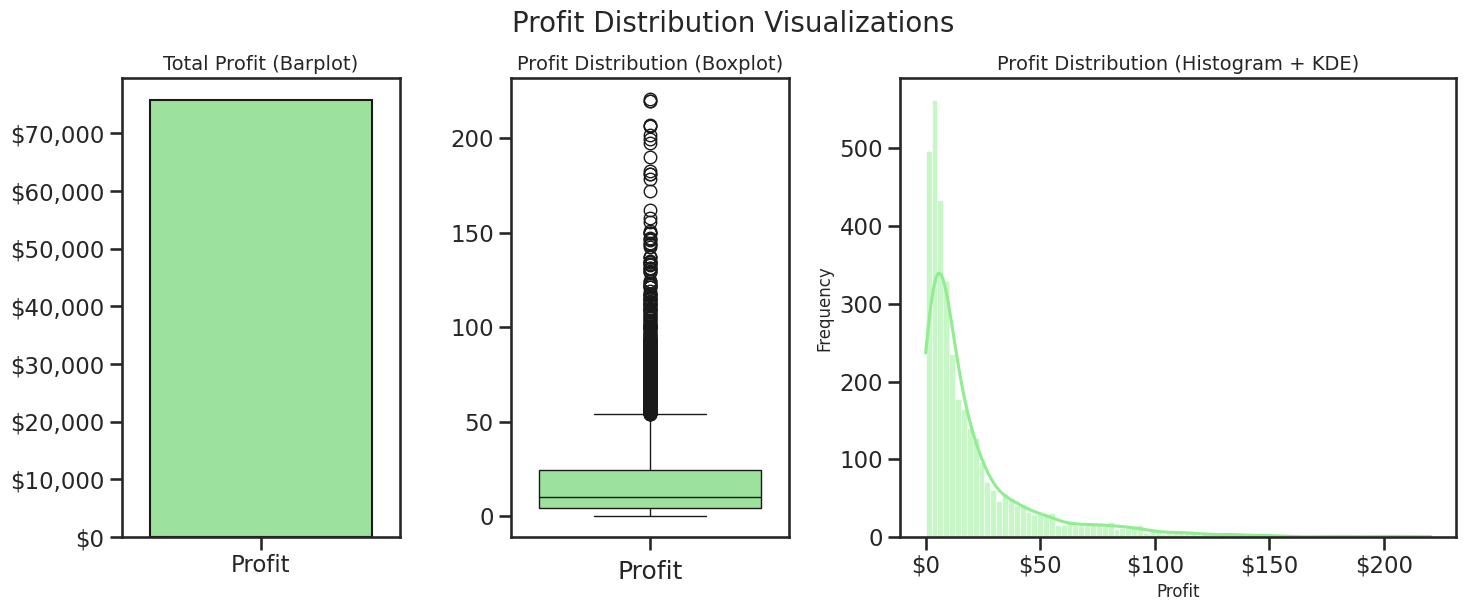

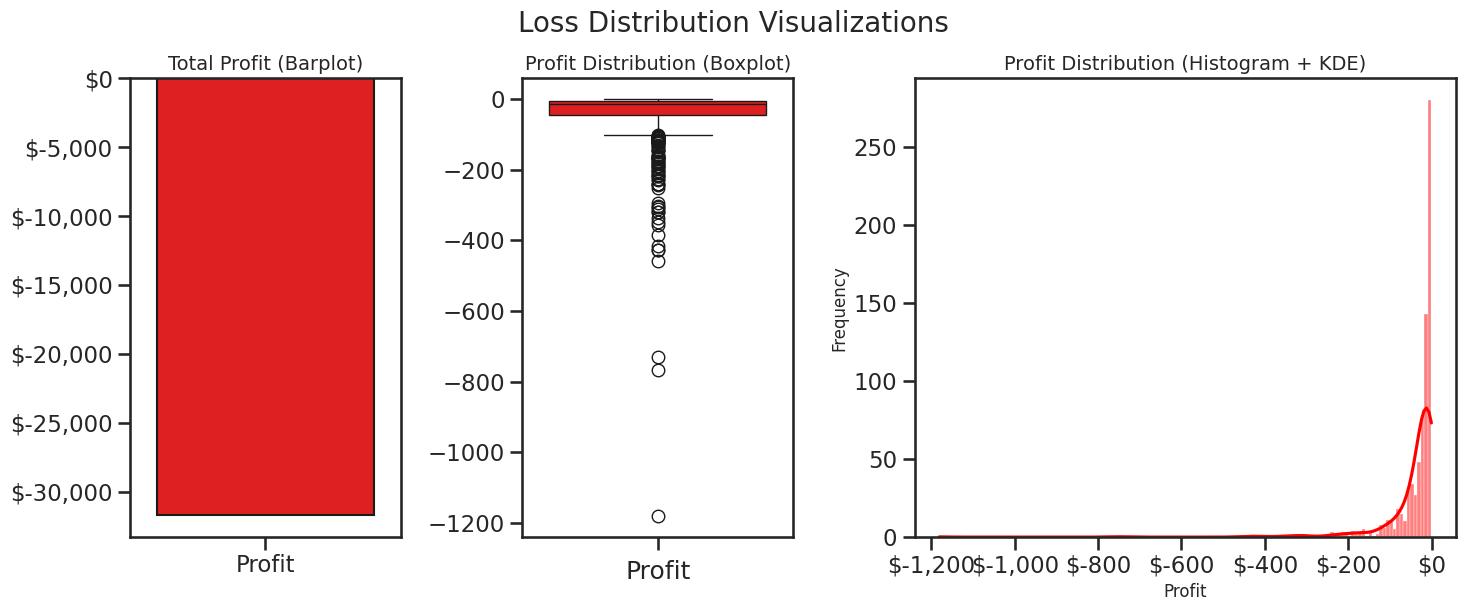

In [ ]:
# Import the script
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import data_prep_utils as dpu
import data_visualization_utils as dvu

# Step 1: Load your dataset
try:
    data = pd.read_excel('sample-superstore.xls')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()

# Step 2: Preprocess the data (derives metrics and standardizes categorical columns)
data = dpu.preprocess_data(data)

# Step 3: Add time-based columns
data = dpu.add_time_based_columns(data)

# Step 4: Convert appropriate columns to category and visualize
exclude_columns = ['Profit per Sub-Category', 'Quantity', 'Estimated Cost', 'Average Discount',
                   'Discount', 'Total Quantity', 'Profit Margin', 'Regional Market Share (%)', 'Profit per Category', 'Order Count']
data = dpu.convert_to_category_and_visualize(data, threshold=25, exclude_columns=exclude_columns)

# Step 5: Remove duplicates
data = dpu.remove_duplicates(data, subset=['Order ID', 'Customer ID'])

# Step 6: (Optional) Standardize specific columns if needed
columns_to_standardize = ['Region', 'Category', 'Sub-Category']
data = dpu.standardize_categorical_columns(data, columns_to_standardize)

# Step 7: Remove outliers in the 'Sales' column using Tukey's Fences
filtered_data, outliers = dpu.remove_outliers_tukey(data, column='Sales', plot=False)

# Group 1: Data with losses (Profit < 0)
data_losses = filtered_data[filtered_data['Profit'] < 0]
# Group 2: Data with profits (Profit >= 0)
data_profits = filtered_data[filtered_data['Profit'] >= 0]

# plot the data
dvu.plot_sales_distribution(data_profits, column='Profit', title='Profit Distribution Visualizations', color='lightgreen')

# plot the data
dvu.plot_sales_distribution(data_losses , column='Profit', title='Loss Distribution Visualizations', color='red')


### Splitting Data into Profits and Losses Rationale

Analyzing profits and losses separately is a strategic approach to uncover the underlying causes of financial performance and inform actionable decisions. Here’s why this methodology makes sense:

1. **Targeted Analysis of Losses:** By isolating data with losses, the analysis can focus specifically on identifying patterns and drivers behind negative profitability, such as high discounts, excessive costs, or inefficient operations, without being diluted by profitable transactions.

2. **Distinct Characteristics:** Profitable and loss-making transactions often have fundamentally different attributes (e.g., discount levels, cost structures). Separating these datasets ensures that trends and anomalies unique to each group are not obscured in aggregated analysis.

3. **Actionable Insights:** Understanding what differentiates loss-making transactions from profitable ones allows for precise interventions, such as adjusting pricing strategies, optimizing cost controls, or targeting high-loss segments.

4. **Visualization and Clarity:** Plotting profits and losses independently makes it easier to visualize their distinct distributions, such as the broader range of costs and higher discount levels in loss-making data, leading to clearer storytelling and better stakeholder communication.

5. **Improved Decision-Making:** This approach ensures that decisions are data-driven and context-specific, helping to minimize losses while reinforcing strategies that maximize profitability.


Figure saved as /content/profit_sumamry_stats.png


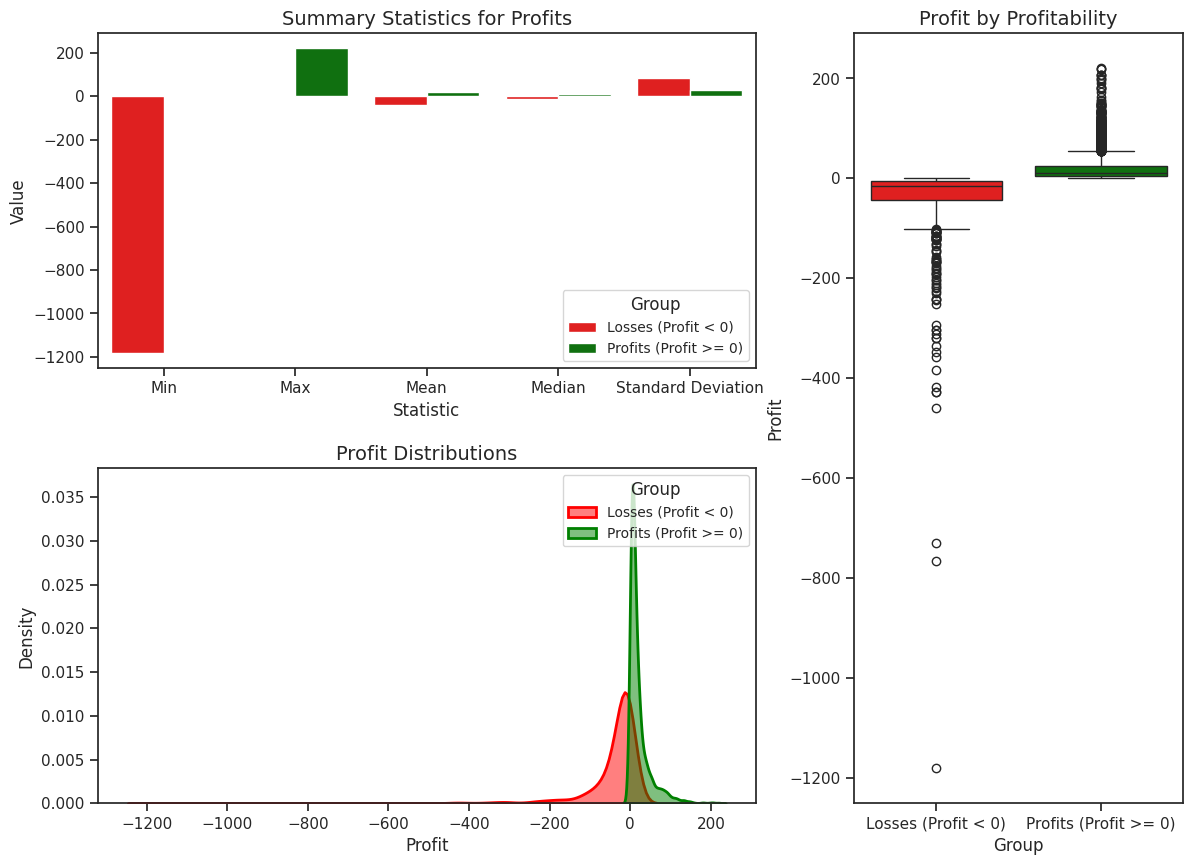

In [ ]:
# Calculate stats for both groups
cost_stats_losses = dvu.calculate_discount_stats(data_losses, column='Profit')
cost_stats_profits = dvu.calculate_discount_stats(data_profits, column='Profit')

# Combine the stats into a single DataFrame
cost_summary_table = pd.DataFrame({
    'Statistic': cost_stats_losses.keys(),
    'Losses (Profit < 0)': cost_stats_losses.values(),
    'Profits (Profit >= 0)': cost_stats_profits.values()
})

# Visualize the metrics and save the figure
save_path = "/content/profit_sumamry_stats.png"

# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Call the function
dvu.plot_discount_analysis_grid(data_losses, data_profits, cost_summary_table, column='Profit')

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

### Summary Statistics for Profits Analysis:

1. **Key Comparisons**:
   - **Mean Profit**: Loss-making transactions have a **mean loss of -40.88**, while profitable transactions average **\$20.92** in profit. This stark contrast highlights the financial impact of unprofitable sales.
   - **Median Profit**: The **median loss (-\$14.39)** is significantly lower than the **median profit (\$10.05)**, suggesting the typical loss is steeper than the typical gain.
   - **Profit Variability**: Losses show a much higher **standard deviation (\$82.41)** compared to profits (\$28.07), indicating that losses vary widely across transactions.

2. **Distribution Differences**:
   - Losses range from **-1181.28** to **-0.27**, a significantly wider and entirely negative range, while profits range from **0.00 to 220.49**, highlighting the imbalance between high losses and relatively modest gains.

3. **Actionable Insights**:
   - **Loss Control**: Focus on addressing the extreme losses (tail-end of the loss distribution). Transactions with very high losses disproportionately affect overall profitability.
   - **Profit Optimization**: Examine factors driving high variability in profitable transactions to replicate success and stabilize margins.
   - **Cost and Discount Alignment**: Cross-analyze costs and discounts in high-loss transactions to identify patterns and reduce financial outliers.

In [ ]:
cost_summary_table

,Statistic,Losses (Profit < 0),Profits (Profit >= 0)
0,Min,-1181.282400,0.000000
1,Max,-0.268500,220.485300
2,Mean,-40.877741,20.916086
3,Median,-14.385600,10.048500
4,Standard Deviation,82.413352,28.072311


## Loss by Year

In [ ]:
df = data_losses.copy()

# Use the aggregate function to calculate metrics for each group
table_profits = dpu.calculate_aggregate_metrics(df, group_by_columns=['Order Year'])

# Display the results
print("\nSummary Table for Profits by Year:")
table_profits


Summary Table for Profits by Year:


,Order Year,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,2014,-5094.7210,-77.652874,-36.527573,16819.9770,11725.2560,0.534420,982,468,24.668116
1,2015,-6355.1013,-72.897417,-34.182110,22368.9241,16013.8228,0.523032,1150,559,24.755537
2,2016,-8898.9544,-64.173640,-32.491276,33886.3454,24987.3910,0.503796,1642,788,24.947869
3,2017,-11372.3503,-72.395193,-33.967952,40499.6347,29127.2844,0.508352,1959,970,25.030467




### **Loss by Year Analysis**

1. **Increasing Losses Over Time**:
   - Total losses have grown significantly year-over-year:
     - **2014**: -5,094.72
     - **2017**: -11,372.35 (more than double the losses from 2014).
   - This trend suggests a need to investigate growing inefficiencies or problem areas.

2. **Declining Profitability Metrics**:
   - **Profit Margin** and **Profitability Ratio** remain negative, reflecting consistent cost inefficiencies:
     - **Profitability Ratio** improved slightly from **-36.53% (2014)** to **-33.97% (2017)**, but the total magnitude of losses outweighs this marginal improvement.

3. **Rising Costs and Sales**:
   - Both estimated costs and sales have increased significantly:
     - **Estimated Costs** grew from **16,819.98 (2014)** to **40,499.63 (2017)**.
     - **Sales** grew from **11,725.26 (2014)** to **29,127.28 (2017)**.
   - The rising sales suggest customer demand is increasing, but cost growth is outpacing revenue gains, contributing to mounting losses.

4. **High Discounting Rates**:
   - Discounts remain very high across all years, averaging around **50%**, potentially eroding profitability:
     - Highest discount rate in **2014 (53.44%)**, but rates remained consistently above 50% in all subsequent years.

5. **Order Count and Quantity Growth**:
   - **Order Count** increased from **982 (2014)** to **1,959 (2017)**, while **Quantity** sold grew from **468 to 970**.
   - This indicates growing transaction volume, which could be leveraged to optimize operations and improve profitability.

6. **Market Share Consistency**:
   - **Regional Market Share (%)** has remained relatively stable around **24.7%–25%**, indicating the losses are not due to market shrinkage but potentially internal inefficiencies.

---

### **Actionable Insights**
1. **Investigate Rising Costs**:
   - Analyze cost drivers contributing to the significant increase in estimated costs relative to sales growth.
   - Focus on high-cost categories, products, or regions.

2. **Reassess Discount Strategies**:
   - Evaluate the effectiveness of discounts and their impact on profitability.
   - Explore targeted discounting to maintain sales while reducing unnecessary margin erosion.

3. **Optimize Operations**:
   - Leverage the growing transaction volume (orders and quantity) to achieve better economies of scale.
   - Identify areas where operational efficiency improvements can mitigate losses.




Figure saved as /content/loss_by_year.png


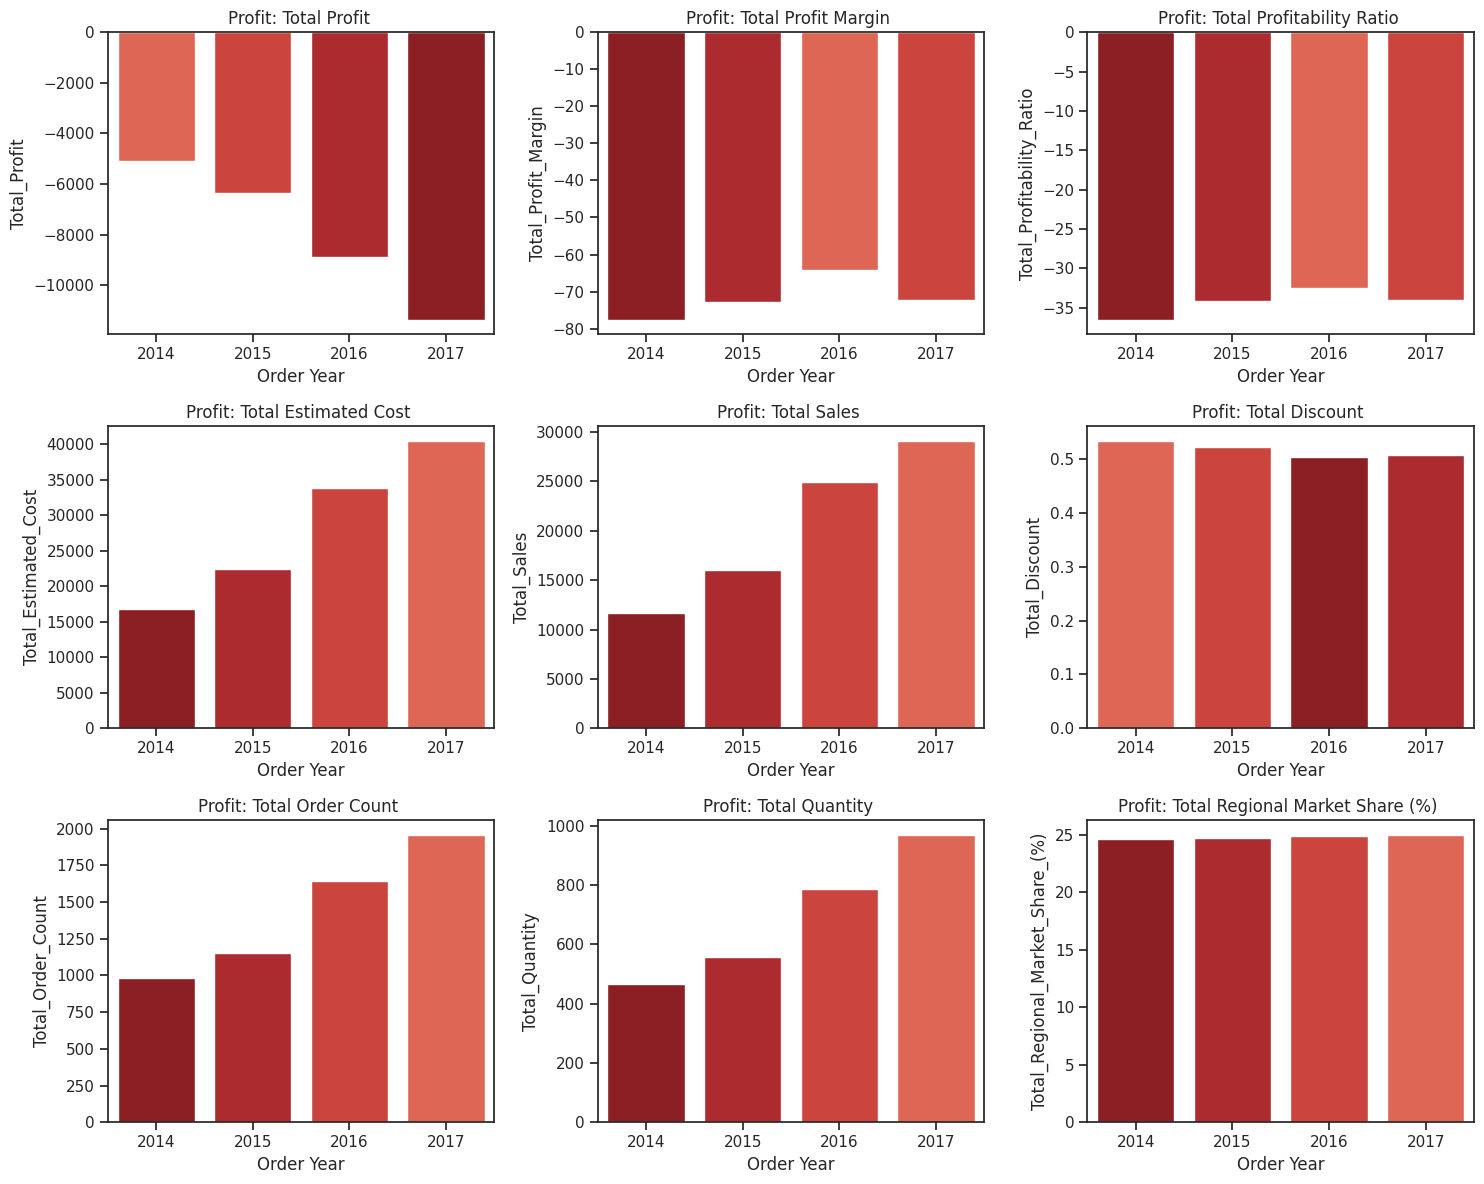

In [ ]:
# Define metrics for visualization
metrics = [
    'Total_Profit',
    'Total_Profit_Margin',
    'Total_Profitability_Ratio',
    'Total_Estimated_Cost',
    'Total_Sales',
    'Total_Discount',
    'Total_Order_Count',
    'Total_Quantity',
    'Total_Regional_Market_Share_(%)'
]

# Visualize the metrics and save the figure
save_path = "/content/loss_by_year.png"

# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Define a subset of darker reds
custom_palette = sns.color_palette("Reds_r", n_colors=8)[0:4]  # Select the darker shades

# Visualize the metrics
dvu.plot_metrics_grid(
    data1=table_profits,
    metrics=metrics,
    group_by_column='Order Year',
    title_prefix="Profit: ",
    palette=custom_palette  # Pass the custom palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

## Region

In [ ]:
# Use the aggregate function to calculate metrics for each region
table_region = dpu.calculate_aggregate_metrics(df, group_by_columns=['Region'])

# Display the results
print("\nSummary Table for Profits by Region:")
table_region


Summary Table for Profits by Region:


,Region,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,Central,-16128.3345,-108.814011,-43.695413,41594.8857,25466.5512,0.594506,2368,1225,21.819594
1,East,-8084.3891,-42.716919,-26.974108,37155.7851,29071.3960,0.468182,1634,709,29.548188
2,South,-2768.4291,-51.456492,-31.323555,11949.1321,9180.7030,0.518349,786,397,17.052140
3,West,-4739.9743,-40.195122,-23.745576,22875.0783,18135.1040,0.384146,945,454,31.580078




### **Regional Loss Analysis**

1. **Highest Losses: Central Region**
   - **Total Loss**: -16,128.33, significantly higher than any other region, accounting for the majority of overall losses.
   - **Profit Margin**: -108.81%, indicating severe inefficiency where costs are far exceeding sales.
   - **Estimated Costs**: **41,594.89**, the highest among all regions, contributing to the significant losses.
   - **Discounts**: **59.45%**, the highest among all regions, suggesting overly aggressive discounting may be eroding profitability.

2. **Lowest Losses: South Region**
   - **Total Loss**: -2,768.43, the lowest among regions.
   - **Profit Margin**: -51.46%, better than Central but still inefficient.
   - **Estimated Costs**: **11,949.13**, reflecting its smaller scale.
   - **Sales**: **9,180.70**, the lowest among all regions, indicating limited demand or market penetration.

3. **East and West Comparisons**
   - **East**:
     - Losses: -8,084.39, the second-highest after Central.
     - **Profit Margin**: -42.72%, showing better efficiency compared to other regions despite the high absolute losses.
     - Strong **Sales (29,071.40)** and **Order Count (1,634)** highlight potential to reverse losses through better cost control.
   - **West**:
     - Losses: -4,739.97, second-lowest among regions.
     - **Profitability Ratio**: -23.75%, the best among regions, indicating better cost management relative to sales.

4. **Discount Strategies**
   - Central and South regions have the highest discount rates (**59.45%** and **51.83%**), likely driving the inefficiencies.
   - East and West have relatively lower discount rates (**46.82%** and **38.41%**), which aligns with their comparatively better margins.

5. **Regional Market Share**
   - **West** has the largest regional market share (**31.58%**), indicating a strong position despite losses.
   - **Central** lags at **21.82%**, showing that its high losses are not offset by a larger market presence.

---

### **Actionable Insights**
1. **Focus on Central**:
   - Central region contributes disproportionately to overall losses. Focus on cost control and revisiting discount strategies to improve margins.

2. **Scale South Region**:
   - South shows the lowest losses but also the smallest market presence. Targeting growth here could help offset losses from larger regions.

3. **Leverage East and West Efficiency**:
   - East and West regions demonstrate better cost management and profitability ratios. Scaling strategies from these regions to Central and South may help improve overall performance.

4. **Review Discounting Practices**:
   - Central and South regions’ discount rates appear excessive. Implement more targeted or conditional discount strategies to reduce unnecessary margin erosion.




Figure saved as /content/loss_by_region.png


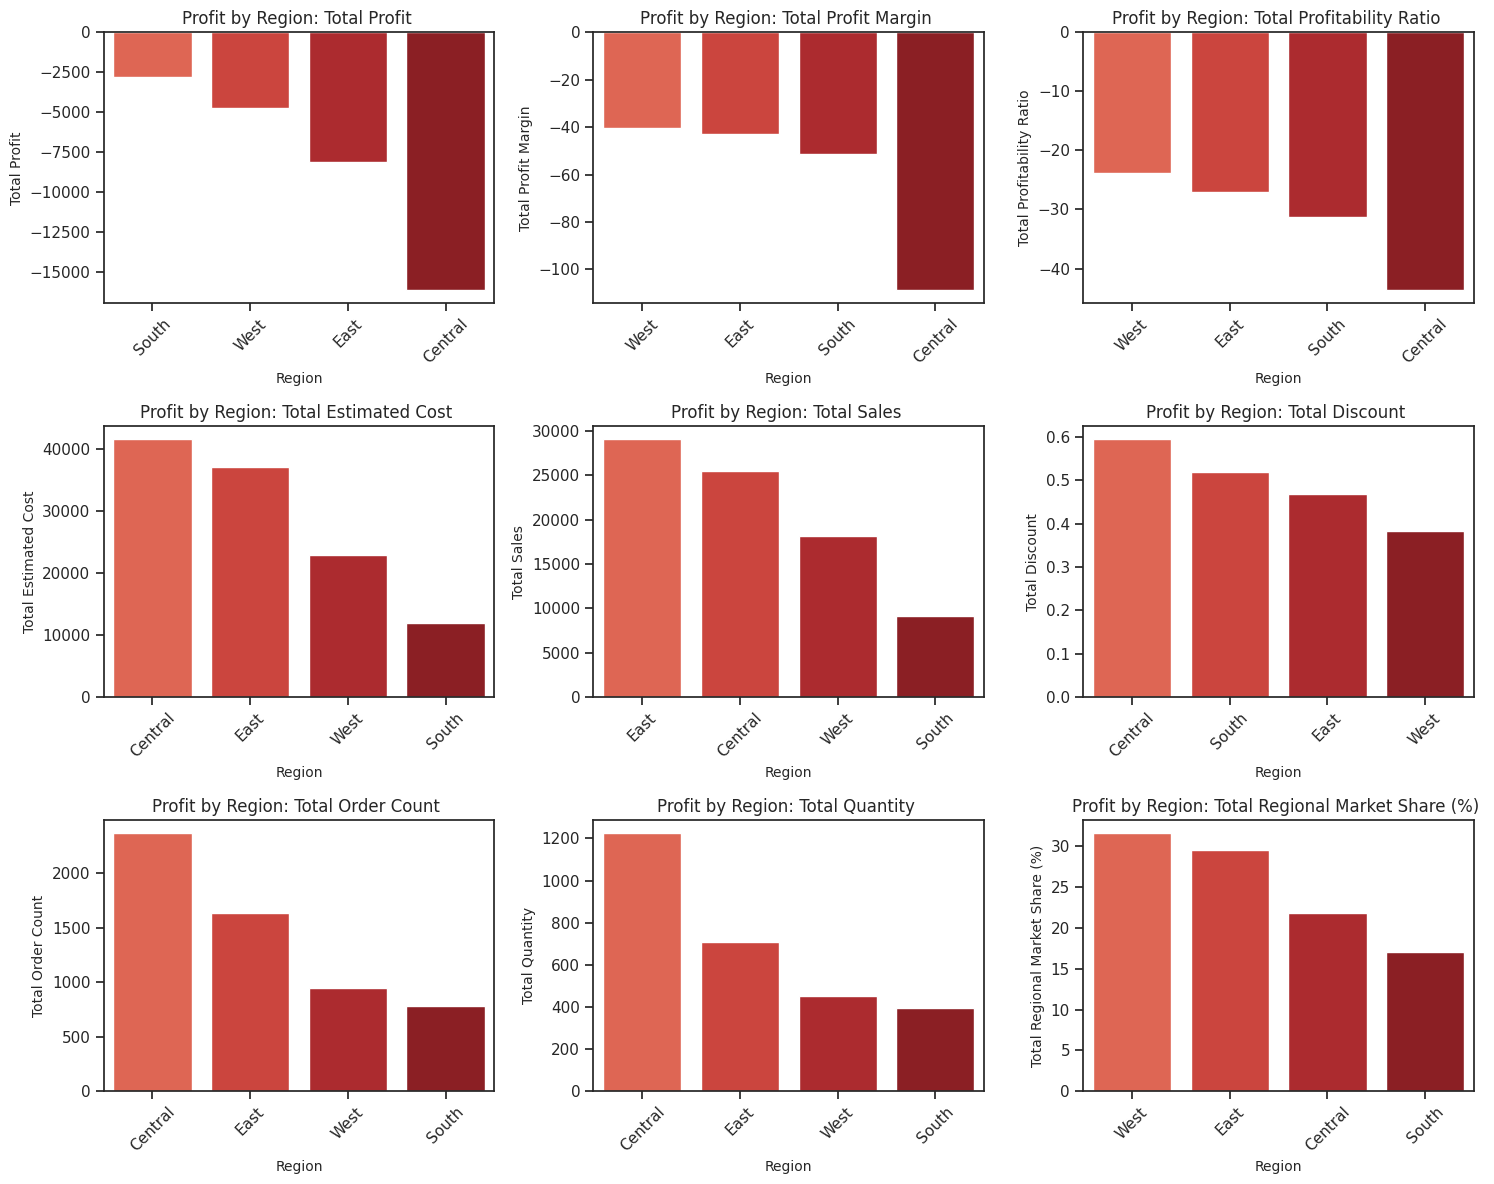

In [ ]:
# Visualize the metrics and save the figure
save_path = "/content/loss_by_region.png"

# Define a subset of darker reds
custom_palette = sns.color_palette("Reds_r", n_colors=8)[0:4]  # Select the darker shades

# Visualize the metrics by Region
dvu.plot_metrics_grid_sorted(
    data1=table_region,
    metrics=metrics,
    group_by_column='Region',
    title_prefix="Profit by Region: ",
    palette=custom_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")


## Region & State

In [ ]:
# Use the aggregate function to calculate metrics by Region and State
table_region_state = dpu.calculate_aggregate_metrics(df, group_by_columns=['Region', 'State'])

# Sort the data within each region by Total Profit in descending order
table_region_state_sorted = table_region_state.sort_values(['Region', 'Total_Profit'], ascending=[True, False])

# Select the top 5 states per region
top_states_by_region = table_region_state_sorted.groupby('Region', observed=True).head(5).reset_index(drop=True)

# Display the results
print("\nTop States by Total Profit for Each Region:")
top_states_by_region


Top States by Total Profit for Each Region:


,Region,State,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,Central,Illinois,-6415.9455,-113.092166,-46.175773,16876.9265,10460.9810,0.616935,930,495,21.819594
1,Central,Texas,-9712.3890,-106.161555,-42.157590,24717.9592,15005.5702,0.580600,1438,730,21.819594
2,East,Rhode Island,-13.7568,-5.714286,-5.405405,254.5008,240.7440,0.300000,10,4,29.548188
3,East,Connecticut,-15.5826,-8.571429,-7.894737,197.3796,181.7970,0.300000,6,1,29.548188
4,East,Maryland,-23.9372,-10.000000,-9.090909,263.3092,239.3720,0.300000,4,2,29.548188
5,East,New Jersey,-31.3722,-12.857143,-11.392405,275.3782,244.0060,0.300000,7,2,29.548188
6,East,Delaware,-37.1124,-18.571429,-15.662651,236.9484,199.8360,0.300000,6,4,29.548188
7,South,North Carolina,-497.4334,-54.565217,-32.628654,1944.8974,1447.4640,0.526087,161,108,17.052140
8,South,Tennessee,-761.0517,-44.967262,-28.069002,3519.3617,2758.3100,0.464286,208,79,17.052140
9,South,Florida,-1509.9440,-53.356452,-32.377180,6484.8730,4974.9290,0.541379,417,210,17.052140


### Region & State Analysis

#### **Central Region**
- **Key States**:
  - **Texas**: The largest losses in the region, with a **Total Profit of -\$9,712.39** and a **profit margin of -106.16%**, stemming from high costs \$24,718 relative to sales \$15,006. The state also has the highest order count (1,438) and quantity (730), suggesting inefficiencies in cost management and discount policies.
  - **Illinois**: Significant losses of **-\$6,415.95**, with a **profit margin of -113.09%**. Like Texas, Illinois has high costs \$16,877 compared to sales \$10,461, indicating potential pricing and operational inefficiencies.
- **Insights**:
  - High losses in both Texas and Illinois are tied to substantial sales volume and large order counts, signaling the need for cost optimization or improved pricing strategies.
  - High discount rates (~0.6%) exacerbate the issue and should be closely monitored.

---

#### **East Region**
- **Key States**:
  - **Delaware**: The highest loss in the region at **-\$37.11**, though relatively low compared to other regions. Costs \$236.95 are significantly higher than sales ($199.84), and discounts remain constant at 0.3%.
  - **Maryland, New Jersey, Rhode Island, and Connecticut**: Losses in these states range from **-\$13.76 to -\$31.37**, primarily driven by minor sales volumes and modest cost overruns. Discounts are consistently low at 0.3%.
- **Insights**:
  - Losses in the East are minor compared to other regions but highlight inefficiencies in small markets.
  - Focused interventions in cost management and supply chain efficiencies could eliminate these small but persistent losses.

---

#### **South Region**
- **Key States**:
  - **Florida**: The largest loss in the region at **-\$1,509.94**, with a **profit margin of -53.36%**. Costs (\$6,485) significantly exceed sales \$4,975, despite the highest order count (417) and quantity (210) in the region.
  - **Tennessee**: Losses of **-\$761.05**, with a **profit margin of -44.97%**, suggest operational inefficiencies given costs (\$3,519) and sales \$2,758.
  - **North Carolina**: Losses of **-\$497.43**, with a **profit margin of -54.57%**, indicating issues with cost control or pricing strategies.
- **Insights**:
  - The South's low market share (17.05%) and significant losses point to structural challenges in competitiveness and efficiency.
  - High discounts (~0.5%) and cost inefficiencies are key drivers of losses in this region.

---

#### **West Region**
- **Key States**:
  - **Colorado**: The largest loss in the region at **-\$1,085.99**, with a **profit margin of -63.80%**, reflecting substantial cost overruns ($3,268) relative to sales \$2,182.
  - **Oregon**: Losses of **-\$1,075.88**, with a **profit margin of -70.06%**, further emphasize cost inefficiencies \$2,768 in costs vs. \$1,692 in sales.
  - **California**: Losses of **-\$844.10** stem from high costs \$9,960 relative to sales \$9,115, despite low discounts (0.19%).
  - **Washington**: Relatively minor losses of **-\$137.39**, reflecting better cost management compared to other states.
- **Insights**:
  - Losses in the West stem from high costs across states like Colorado, Oregon, and California, suggesting a need for stricter cost controls or renegotiation of supply chain contracts.
  - Despite lower discounts, inefficiencies in operations or pricing strategies contribute to losses.

---

#### **Strategic Recommendations**
1. **Focus on High-Loss States**:
   - Target cost optimization strategies in Texas, Illinois, and Florida, which account for the majority of losses.
2. **Review Pricing and Discounts**:
   - Reassess pricing structures and limit high discounts, particularly in regions like the Central and South.
3. **Optimize Operations in the West**:
   - Address inefficiencies in states like Colorado and Oregon through supply chain renegotiation and process improvements.
4. **Expand in the East**:
   - Minor losses in the East indicate opportunities for growth, especially in states with low-cost overruns.
5. **Leverage Data-Driven Insights**:
   - Implement analytics to identify and resolve state-specific inefficiencies in cost management and pricing.

Figure saved as /content/loss_by_region_state.png


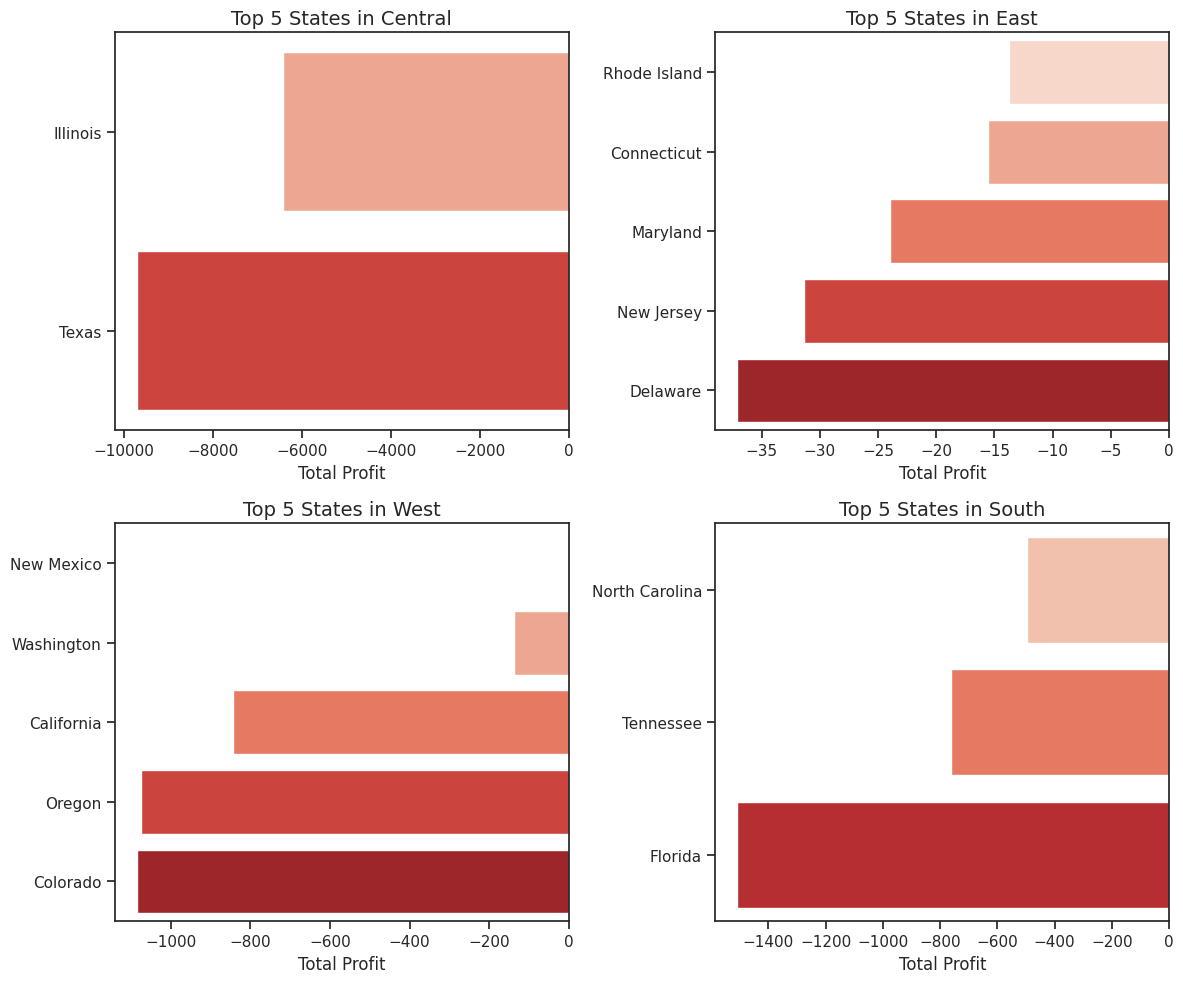

In [ ]:
# Define regions for filtering
regions = df['Region'].unique()

# Visualize the metrics and save the figure
save_path = "/content/loss_by_region_state.png"

# Set up a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot each region
for i, region in enumerate(regions):
    # Filter top 5 states for the current region
    region_data = top_states_by_region[top_states_by_region['Region'] == region]

    # Dynamically adjust the number of colors in the palette for the top 5 states
    colors = sns.color_palette("Reds_r", len(region_data))

    # Plot the data
    sns.barplot(
        data=region_data,
        x='Total_Profit',
        y='State', hue='Total_Profit', legend=False, dodge=False,
        palette=colors,  # Use the dynamically created palette
        ax=axes[i]
    )
    axes[i].set_title(f"Top 5 States in {region}", fontsize=14)
    axes[i].set_xlabel("Total Profit", fontsize=12)
    axes[i].set_ylabel("", fontsize=12)

# Hide any unused axes (in case there are fewer than 4 regions)
for j in range(len(regions), 4):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
# plt.show()

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

## Segment

In [ ]:
# Use the aggregate function to calculate metrics for each segment
table_segment = dpu.calculate_aggregate_metrics(df, group_by_columns=['Segment'])

# Display the results
print("\nSummary Table for Profits by Segment:")
table_segment


Summary Table for Profits by Segment:


,Segment,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,Consumer,-17337.5087,-72.584083,-34.294696,61468.5079,44130.9992,0.515648,3189,1482,25.022909
1,Corporate,-9740.3910,-68.320475,-33.393416,34147.6166,24407.2256,0.507838,1657,838,24.911829
2,Home Office,-4643.2273,-71.170082,-34.409379,17958.7567,13315.5294,0.523525,887,465,24.367702




### **Segment Loss Analysis**

1. **Highest Losses: Consumer Segment**
   - **Total Loss**: -17,337.51, the highest among all segments, accounting for the majority of losses.
   - **Profit Margin**: -72.58%, indicating substantial inefficiency in converting sales into profit.
   - **Estimated Costs**: **61,468.51**, the highest among segments, reflecting the scale of this segment's operations.
   - **Sales**: **44,131.00**, the highest among all segments, showing that despite high sales, costs and discounts are driving losses.

2. **Moderate Losses: Corporate Segment**
   - **Total Loss**: -9,740.39, the second-highest among segments.
   - **Profit Margin**: -68.32%, slightly better than Consumer but still poor.
   - **Estimated Costs**: **34,147.62**, significantly lower than Consumer, but with much lower sales at **24,407.23**.
   - **Discount Rate**: **50.78%**, suggesting aggressive discounting, though slightly lower than Consumer.

3. **Lowest Losses: Home Office Segment**
   - **Total Loss**: -4,643.23, the lowest among segments, indicating smaller-scale operations.
   - **Profit Margin**: -71.17%, comparable to Consumer but with significantly lower absolute losses.
   - **Estimated Costs**: **17,958.76**, the smallest among all segments.
   - **Sales**: **13,315.53**, also the lowest, reflecting its niche or limited scope.

4. **Discount Rates Across Segments**
   - **Home Office** has the highest discount rate (**52.35%**), which likely contributes to its losses despite being the smallest segment.
   - Consumer and Corporate have similarly high discount rates (**51.56%** and **50.78%**), which undermine their profitability.

5. **Order Count and Quantity**
   - Consumer has the highest **Order Count (3,189)** and **Quantity (1,482)**, indicating significant transaction volume that amplifies its losses.
   - Home Office lags behind in both metrics, consistent with its smaller scale.

6. **Regional Market Share**
   - The market shares for all segments are fairly consistent, with Consumer slightly leading at **25.02%**, followed by Corporate (**24.91%**) and Home Office (**24.65%**). This uniformity suggests that losses are not due to unequal market distribution but operational inefficiencies.

---

### **Actionable Insights**
1. **Reassess Consumer Segment**:
   - The Consumer segment drives the majority of losses. Investigate cost drivers, discount strategies, and operational inefficiencies to mitigate its impact.

2. **Target Home Office Discounting**:
   - Despite being the smallest segment, Home Office has the highest discount rate. Optimizing discount strategies here could significantly improve margins.

3. **Improve Corporate Cost Efficiency**:
   - Corporate shows moderate losses. Focus on cost reductions or scaling successful practices from the more efficient Home Office operations.

4. **Leverage Volume in Consumer**:
   - The high order count and transaction volume in Consumer suggest opportunities to optimize economies of scale or streamline operations to reduce costs.


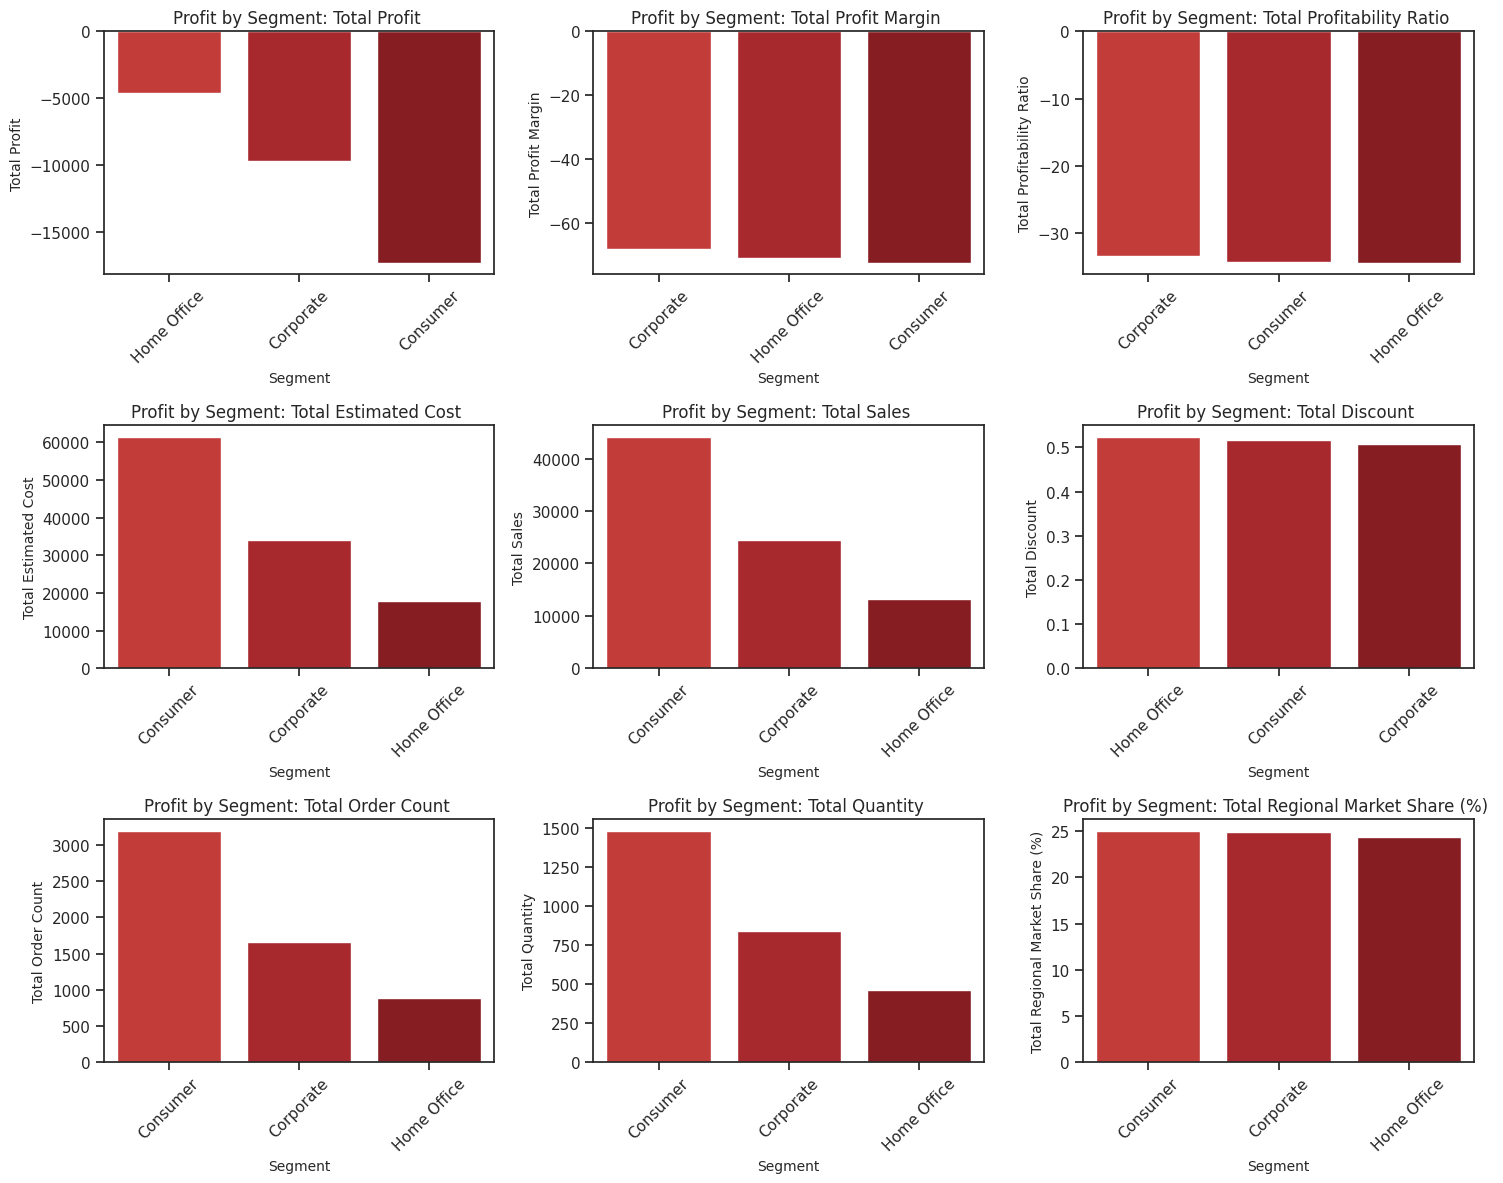

In [ ]:
# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Define a subset of darker reds
custom_palette = sns.color_palette("Reds_r", n_colors=9)[0:3]  # Select the darker shades

# Visualize metrics by segment
dvu.plot_metrics_grid_sorted(
    data1=table_segment,
    metrics=metrics,
    group_by_column='Segment',
    title_prefix="Profit by Segment: ",
    palette=custom_palette
)


## Category

In [ ]:
# Use the aggregate function to calculate metrics for each segment
table_category = dpu.calculate_aggregate_metrics(df, group_by_columns=['Category'])

# Display the results
print("\nSummary Table for Profits by Category:")
table_category


Summary Table for Profits by Category:


,Category,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,Furniture,-14388.3928,-35.963319,-22.256118,67026.0080,52637.6152,0.382266,2047,923,25.687639
1,Office Supplies,-15071.9634,-104.874498,-45.656145,33957.6924,18885.7290,0.643614,3024,1581,23.878809
2,Technology,-2260.7708,-20.307229,-15.567348,12591.1808,10330.4100,0.313253,662,281,27.256786



### **Key Insights from Category Loss Analysis**

1. **Highest Losses: Office Supplies**
   - **Total Loss**: -15,071.96, the highest among categories, contributing significantly to overall losses.
   - **Profit Margin**: -104.87%, indicating severe inefficiency with costs exceeding sales by a wide margin.
   - **Estimated Costs**: **33,957.69**, moderately lower than Furniture but associated with much lower sales (**18,885.73**).
   - **Discount Rate**: **64.36%**, the highest across categories, suggesting over-discounting is eroding profitability.

2. **High Losses: Furniture**
   - **Total Loss**: -14,388.39, slightly lower than Office Supplies.
   - **Profit Margin**: -35.96%, better than Office Supplies but still far from profitable.
   - **Estimated Costs**: **67,026.01**, the highest among categories, highlighting the scale of this category.
   - **Sales**: **52,637.62**, the largest among categories, showing that despite higher sales, costs and inefficiencies are driving losses.
   - **Discount Rate**: **38.23%**, significantly lower than Office Supplies, indicating other factors contribute to losses here.

3. **Lowest Losses: Technology**
   - **Total Loss**: -2,260.77, the smallest among categories.
   - **Profit Margin**: -20.31%, the best among categories, reflecting relatively better cost management.
   - **Estimated Costs**: **12,591.18**, the lowest among categories, consistent with its smaller scale.
   - **Sales**: **10,330.41**, the lowest, but losses are minimized due to more efficient operations and the lowest discount rate (**31.33%**).

4. **Regional Market Share**
   - **Technology** leads with the highest market share (**27.26%**), despite having the lowest sales and losses. This indicates it has strong regional presence but operates on a smaller scale.
   - **Office Supplies** has the smallest market share (**23.88%**), correlating with its significant losses and inefficiencies.

5. **Order Count and Quantity**
   - **Office Supplies** has the highest **Order Count (3,024)** and **Quantity (1,581)**, reflecting strong demand but paired with excessive discounts and inefficiencies.
   - **Technology** lags with the lowest **Order Count (662)** and **Quantity (281)**, highlighting its smaller footprint.

---

### **Actionable Insights**
1. **Address Inefficiencies in Office Supplies**:
   - High losses and discounts in Office Supplies warrant a comprehensive review of cost structures and discounting practices.
   - Focus on optimizing product offerings or targeting high-margin items within this category.

2. **Leverage Strengths in Technology**:
   - Despite its smaller scale, Technology demonstrates the best profitability metrics. Consider scaling this category to offset losses from Office Supplies and Furniture.

3. **Streamline Furniture Operations**:
   - Furniture losses are driven by high costs. Investigate operational inefficiencies or explore pricing adjustments to improve profitability.

4. **Reassess Discounting Strategies**:
   - Office Supplies and Furniture require targeted discount optimizations to reduce their impact on losses while maintaining demand.




Figure saved as /content/loss_by_category.png


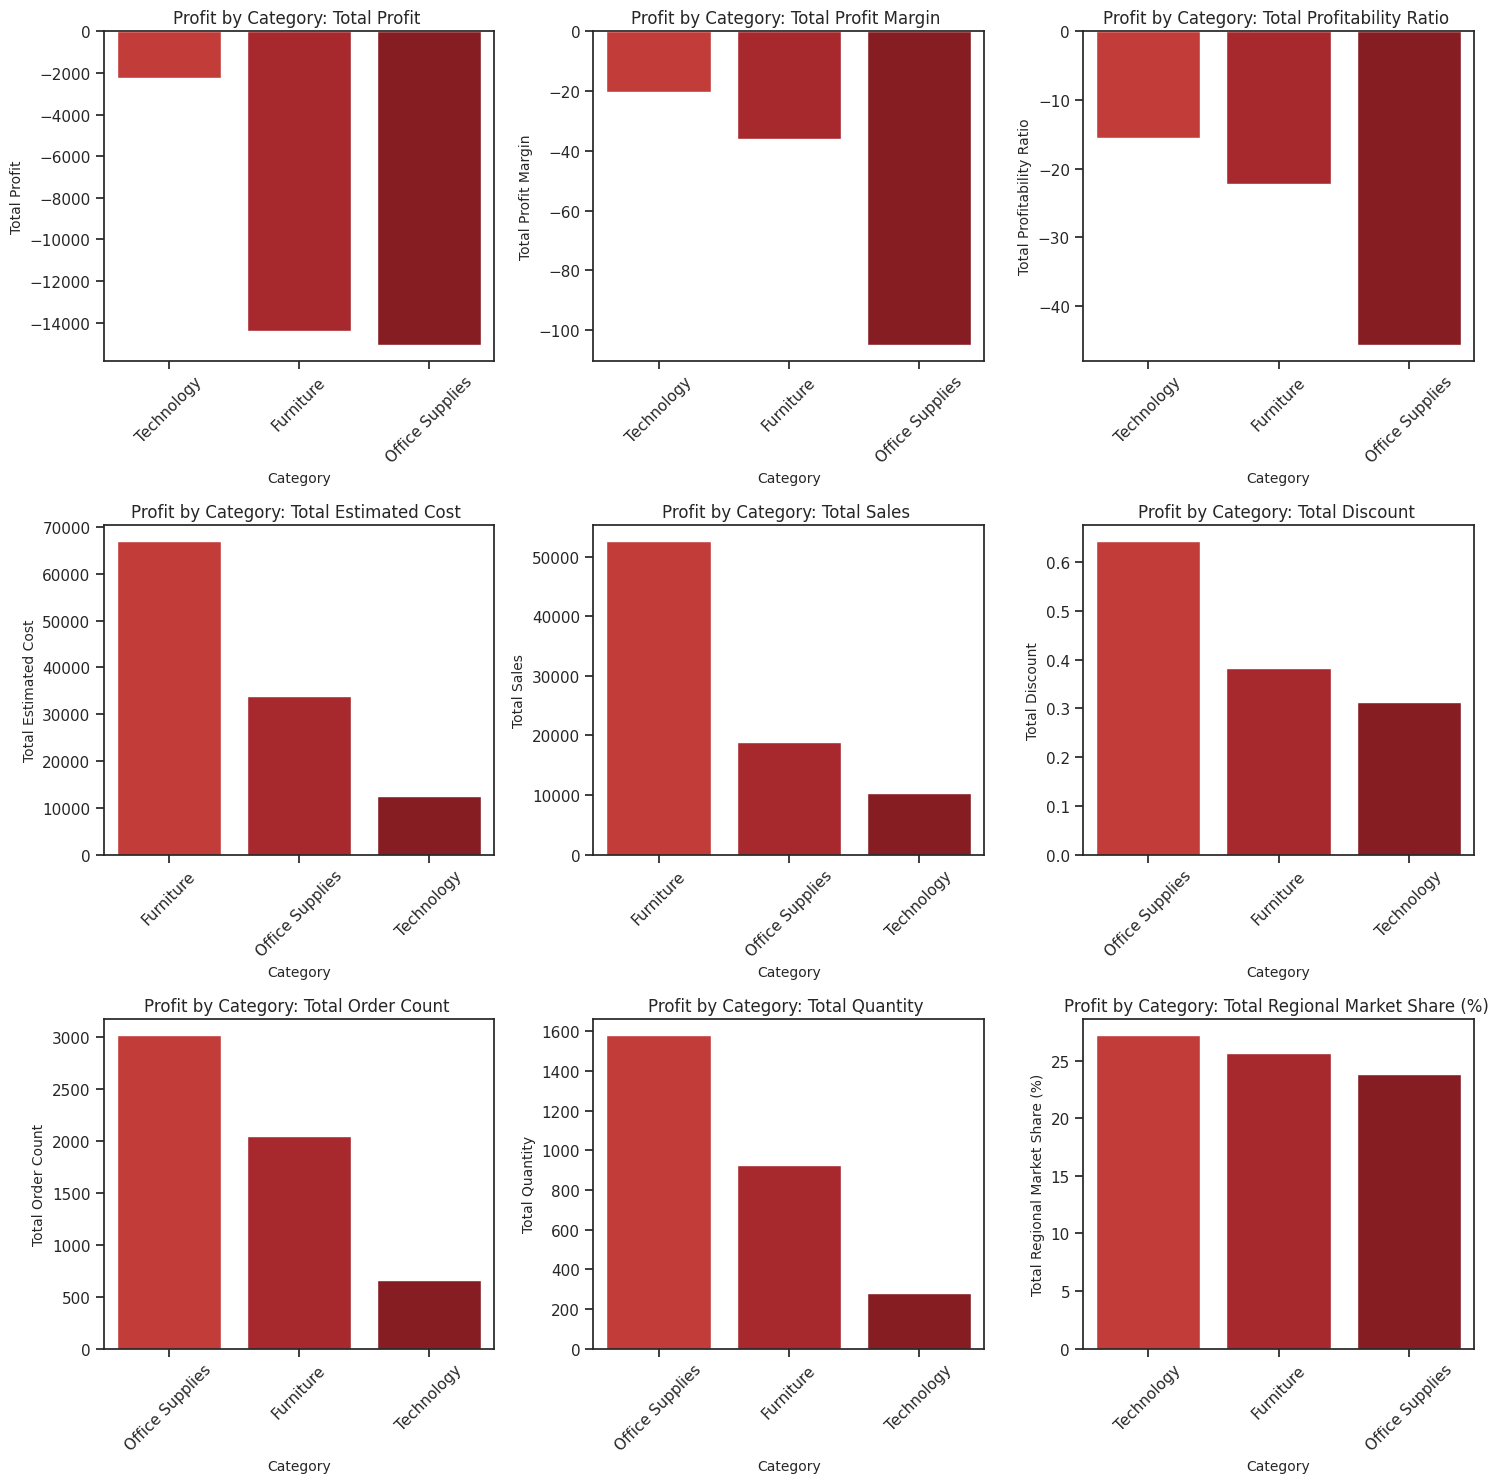

In [ ]:
# Visualize the metrics and save the figure
save_path = "/content/loss_by_category.png"

# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Define a subset of darker reds
custom_palette = sns.color_palette("Reds_r", n_colors=9)[0:3]  # Select the darker shades

# Visualize metrics by Category
dvu.plot_metrics_grid_sorted(
    data1=table_category,  # Replace with the Category table
    metrics=metrics,
    group_by_column='Category',  # Group by Category instead of Segment
    title_prefix="Profit by Category: ",
    palette=custom_palette,
    figsize=(15, 15))

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

## Sub-Category

In [ ]:
# Use the aggregate function to calculate metrics for each sub-category
table_subcategory = dpu.calculate_aggregate_metrics(df, group_by_columns=['Category', 'Sub-Category'])

# Display the results
print("\nSummary Table for Profits by Sub-Category:")
table_subcategory


Summary Table for Profits by Sub-Category:


,Category,Sub-Category,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,Furniture,Bookcases,-2767.0382,-44.553127,-22.460531,11403.7644,8636.7262,0.355946,268,116,27.031243
1,Furniture,Chairs,-2867.6431,-12.829156,-10.778685,25633.2161,22765.5730,0.256842,705,322,26.718318
2,Furniture,Furnishings,-3537.0358,-61.812500,-35.428430,9126.5838,5589.5480,0.545000,600,310,22.620671
3,Furniture,Tables,-5216.6757,-33.114653,-22.695631,20862.4437,15645.7680,0.380303,474,175,27.168389
4,Office Supplies,Appliances,-5417.5448,-251.184211,-71.381509,7565.0128,2147.4680,0.800000,289,130,21.819594
5,Office Supplies,Binders,-7769.3608,-108.534002,-50.073966,15164.2618,7394.9010,0.739465,2210,1209,24.005831
6,Office Supplies,Fasteners,-18.2723,-21.250000,-17.508236,100.4403,82.1680,0.200000,34,23,27.675884
7,Office Supplies,Storage,-1653.5869,-19.025424,-15.762340,9909.5069,8255.9200,0.200000,401,177,24.150221
8,Office Supplies,Supplies,-213.1986,-21.250000,-17.511994,1218.4706,1005.2720,0.200000,90,42,24.255386
9,Technology,Accessories,-262.0419,-9.000000,-8.028405,2696.4739,2434.4320,0.200000,234,102,25.196989




### **Sub-Category Loss Analysis**

#### **1. High-Loss Sub-Categories**
- **Binders (Office Supplies)**:
  - **Total Loss**: -7,769.36, the highest among all sub-categories.
  - **Profit Margin**: -108.53%, indicating significant inefficiencies with costs more than doubling sales.
  - **Estimated Costs**: **15,164.26**, one of the highest across sub-categories.
  - **Order Count (2,210)** and **Quantity (1,209)** highlight high demand but substantial inefficiencies.

- **Tables (Furniture)**:
  - **Total Loss**: -5,216.68, the highest among furniture sub-categories.
  - **Profit Margin**: -33.11%, reflecting moderate inefficiencies compared to Binders.
  - **Estimated Costs**: **20,862.44**, second-highest in Furniture, driving losses despite relatively high sales (**15,645.77**).

- **Appliances (Office Supplies)**:
  - **Total Loss**: -5,417.54, a major contributor to losses.
  - **Profit Margin**: -251.18%, the worst across all sub-categories, indicating severe inefficiencies.
  - **Estimated Costs**: **7,565.01**, exceeding sales (**2,147.47**) by a large margin.

---

#### **2. Low-Loss Sub-Categories**
- **Fasteners (Office Supplies)**:
  - **Total Loss**: -18.27, the lowest among all sub-categories.
  - **Profit Margin**: -21.25%, reflecting better control over costs relative to sales.
  - **Order Count (34)** and **Quantity (23)** are minimal, contributing to its low impact on overall losses.

- **Supplies (Office Supplies)**:
  - **Total Loss**: -213.20, another low contributor.
  - While sales are limited (**1,005.27**), the smaller scale minimizes its impact on overall losses.

- **Accessories (Technology)**:
  - **Total Loss**: -262.04, the lowest in Technology.
  - **Profit Margin**: -9.00%, the best among all sub-categories, reflecting relatively good cost management.

---

#### **3. Category-Specific Observations**
- **Furniture**:
  - **Chairs** and **Tables** are the largest contributors to losses, with substantial costs driving inefficiencies.
  - **Furnishings** (-61.81% profit margin) shows particularly poor performance relative to its sales scale.

- **Office Supplies**:
  - **Binders** and **Appliances** are the primary drivers of losses in this category.
  - Despite high transaction volume, discounts and costs severely undermine profitability.

- **Technology**:
  - While Technology sub-categories generally have lower losses, **Phones** (-1,534.06) stands out due to high costs (**8,771.26**) relative to sales (**7,237.19**).
  - **Accessories** shows potential for improvement with the best profit margin among all sub-categories.

---

### **Actionable Insights**
1. **Address Key Loss Drivers**:
   - Focus on sub-categories like **Binders**, **Tables**, and **Appliances**, which show the highest losses and inefficiencies.
   - Investigate cost structures and pricing strategies to improve profitability.

2. **Optimize Discount Strategies**:
   - High discount rates in sub-categories like **Appliances (80%)** and **Binders (73.95%)** require reassessment to minimize margin erosion.

3. **Scale Low-Loss Sub-Categories**:
   - Sub-categories like **Accessories** and **Fasteners** demonstrate better cost control and could be scaled to offset losses in high-impact areas.

4. **Leverage Volume in Office Supplies**:
   - Despite inefficiencies, Office Supplies sub-categories have high transaction volumes, offering opportunities to optimize economies of scale.

5. **Target Phones in Technology**:
   - Phones contribute the most to Technology's losses. Focus on improving cost efficiency or adjusting pricing to recover profitability.



Figure saved as /content/loss_category_furniture_tech_discount.png
Figure saved as /content/loss_category_office_supplies_discount.png


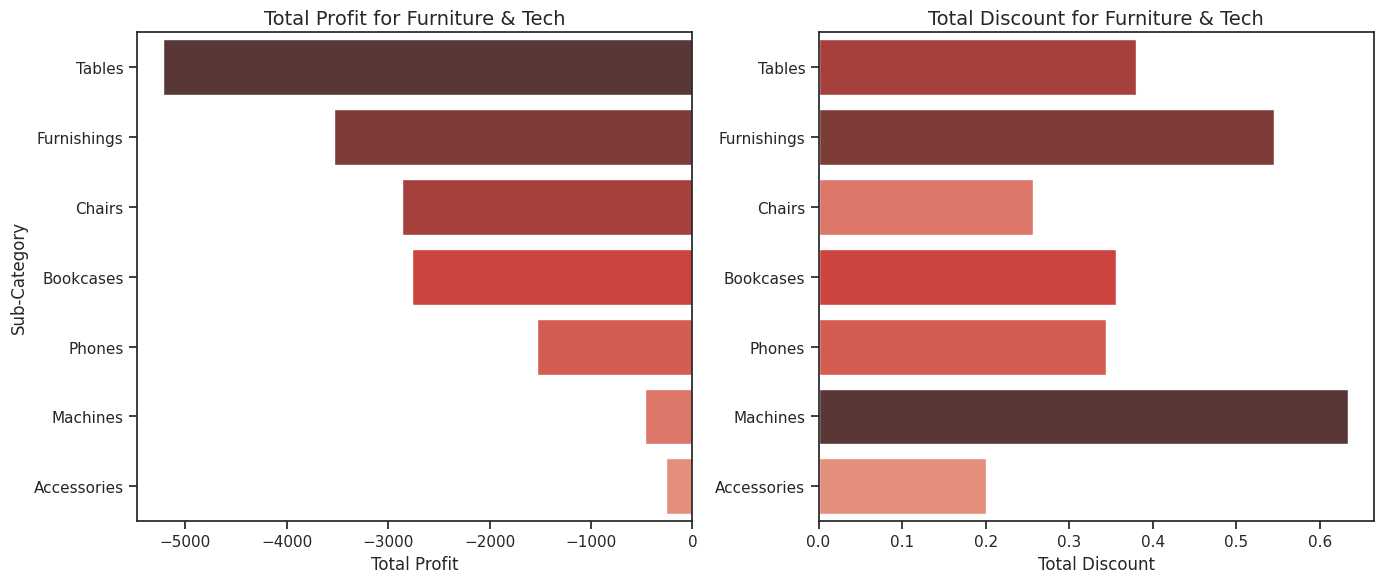

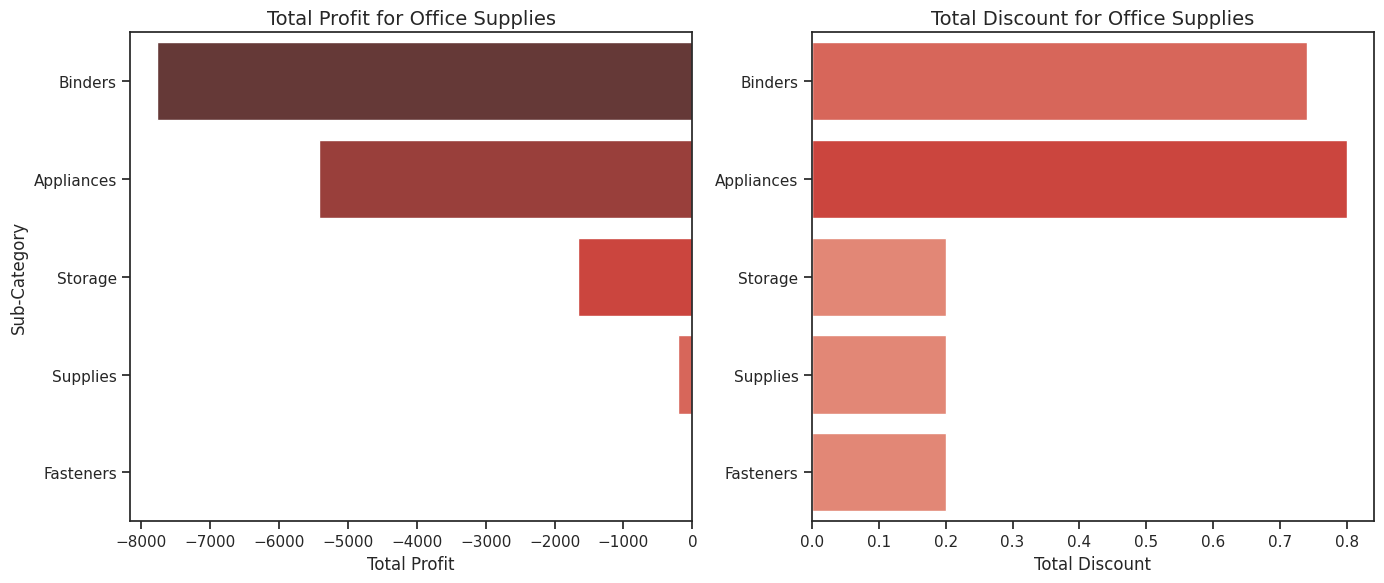

In [ ]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

# Filter datasets for losses
ft_table = table_subcategory[
    (table_subcategory['Category'].isin(['Furniture', 'Technology'])) &
    (table_subcategory['Total_Profit'] < 0)
]
office_table = table_subcategory[
    (table_subcategory['Category'].isin(['Office Supplies'])) &
    (table_subcategory['Total_Profit'] < 0)
]

# Reset categories for the Sub-Category column
ft_table = dvu.reset_categories(ft_table, ['Sub-Category'])
office_table = dvu.reset_categories(office_table, ['Sub-Category'])

# Sort tables by Total Profit (ascending for losses)
ft_table_sorted = ft_table.sort_values(by='Total_Profit', ascending=True).reset_index(drop=True)
office_table_sorted = office_table.sort_values(by='Total_Profit', ascending=True).reset_index(drop=True)

# Visualize the metrics and save the figure
save_path = "/content/loss_category_furniture_tech_discount.png"

dvu.plot_metric_pair_grid_profit_discount(
    data=ft_table_sorted,
    metric1='Total_Profit',
    metric2='Total_Discount',
    group_by='Sub-Category',
    category='Furniture & Tech',
    # title_prefix="Loss Analysis: ",
    palette="Reds_d",
    figsize=(14, 6)
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

# Visualize the metrics and save the figure
save_path = "/content/loss_category_office_supplies_discount.png"

dvu.plot_metric_pair_grid_profit_discount(
    data=office_table_sorted,
    metric1='Total_Profit',
    metric2='Total_Discount',
    group_by='Sub-Category',
    category='Office Supplies',
    # title_prefix="Loss Analysis: ",
    palette="Reds_d",
    figsize=(14, 6)
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

Figure saved as /content/loss_category_furniture_tech_cost.png
Figure saved as /content/loss_category_office_supplies_cost.png


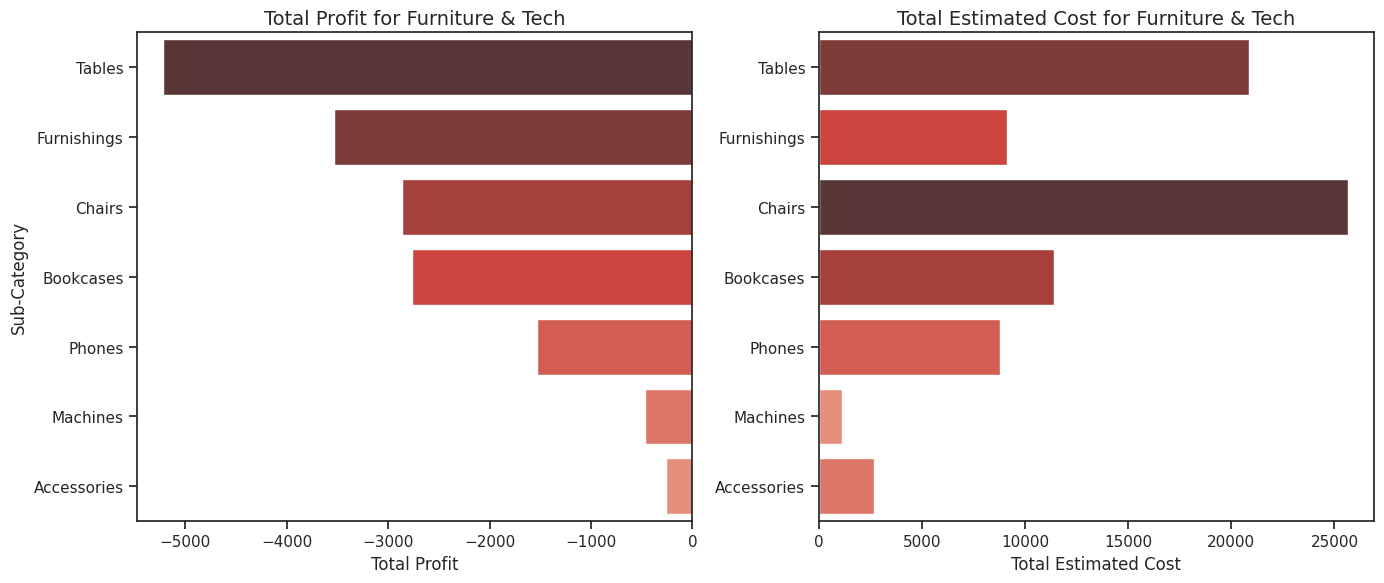

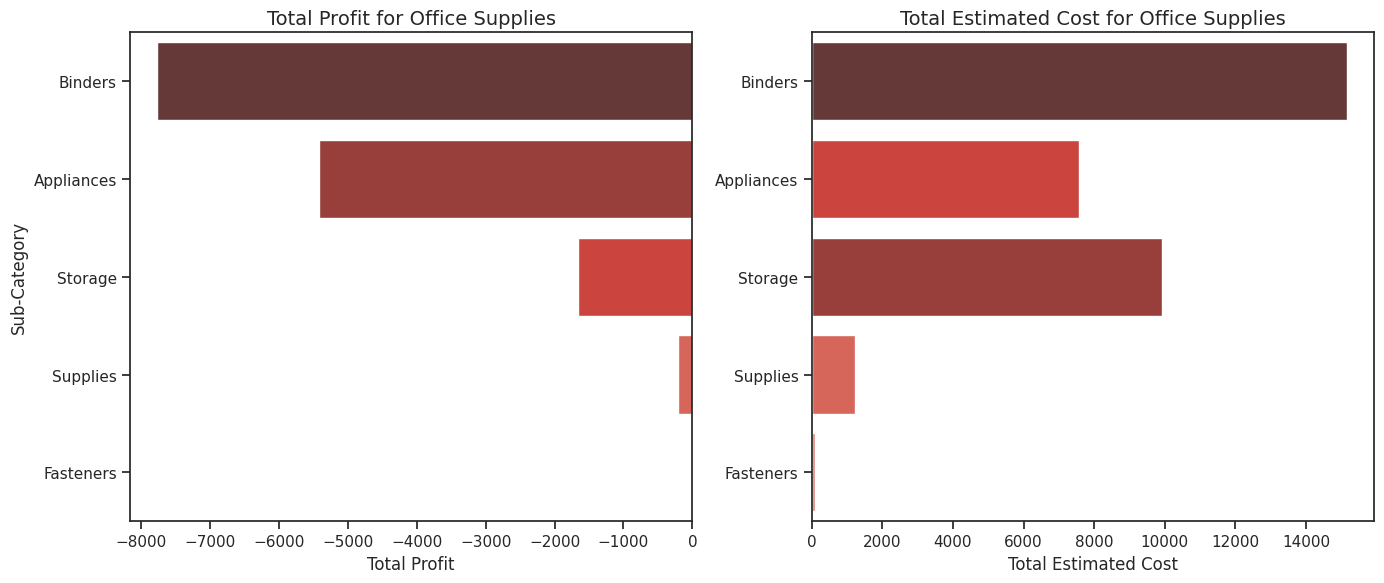

In [ ]:
# Visualize the metrics and save the figure
save_path = "/content/loss_category_furniture_tech_cost.png"

dvu.plot_metric_pair_grid_profit_discount(
    data=ft_table_sorted,
    metric1='Total_Profit',
    metric2='Total_Estimated_Cost',
    group_by='Sub-Category',
    category='Furniture & Tech',
    # title_prefix="Loss Analysis: ",
    palette="Reds_d",
    figsize=(14, 6)
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

# Visualize the metrics and save the figure
save_path = "/content/loss_category_office_supplies_cost.png"

dvu.plot_metric_pair_grid_profit_discount(
    data=office_table_sorted,
    metric1='Total_Profit',
    metric2='Total_Estimated_Cost',
    group_by='Sub-Category',
    category='Office Supplies',
    # title_prefix="Loss Analysis: ",
    palette="Reds_d",
    figsize=(14, 6)
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

## Region, Category, Sub-Category

In [ ]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

# Create the aggregated table grouped by Region, Category, and Sub-Category
table_subcategory_region = dpu.calculate_aggregate_metrics(
    data=df,
    group_by_columns=['Region', 'Category', 'Sub-Category']
)

# Sort by Total Profit (ascending for losses)
table_subcategory_region_sorted = table_subcategory_region.sort_values(['Region', 'Total_Profit'], ascending=[True, True])

# Select the top 5 sub-categories with the largest losses per region
top_losses_by_region = (
    table_subcategory_region_sorted
    .groupby('Region')
    .head(5)
    .reset_index(drop=True)
)

# Display the results
print("\nTop 5 Sub-Categories with Largest Losses per Region:")
top_losses_by_region


Top 5 Sub-Categories with Largest Losses per Region:


,Region,Category,Sub-Category,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,Central,Office Supplies,Appliances,-5417.5448,-251.184211,-71.381509,7565.0128,2147.468,0.800000,289,130,21.819594
1,Central,Office Supplies,Binders,-4203.2011,-161.483051,-61.722618,6771.5551,2568.354,0.800000,862,500,21.819594
2,Central,Furniture,Furnishings,-3358.6064,-70.253623,-39.807503,7028.8824,3670.276,0.600000,515,275,21.819594
3,Central,Furniture,Chairs,-1032.5475,-14.714286,-11.951685,8409.4065,7376.859,0.300000,202,109,21.819594
4,Central,Furniture,Tables,-973.0478,-34.530612,-22.555060,3745.4088,2772.361,0.385714,95,39,21.819594
5,East,Furniture,Tables,-1983.7433,-27.976190,-21.077391,8908.6883,6924.945,0.380769,188,62,29.548188
6,East,Office Supplies,Binders,-1828.9757,-75.020080,-42.809981,4267.5467,2438.571,0.700000,622,295,29.548188
7,East,Technology,Phones,-1374.9693,-23.235294,-18.362788,7916.0433,6541.074,0.400000,257,116,29.548188
8,East,Furniture,Bookcases,-952.8625,-43.113636,-26.707720,3585.7125,2632.850,0.390909,74,39,29.548188
9,East,Furniture,Chairs,-775.2814,-13.840049,-11.344189,6441.9314,5666.650,0.292308,192,84,29.548188



### **Region, Category, Sub-Category Analysis**

#### **Central Region**
1. **Largest Losses**:
   - **Appliances (Office Supplies)**: Loss of **-\$5,417**, with an extremely poor **profit margin (-251%)** and high discount rate (**80%**).
   - **Binders (Office Supplies)**: Loss of **-\$4,203**, driven by high demand but paired with inefficiencies and steep discounts.
2. **Furniture Losses**:
   - **Furnishings**: Loss of **-$3,358**, with a **profit margin of -70%**. Despite moderate sales, costs remain high.
   - **Chairs** and **Tables**: Smaller losses but reflect inefficiencies that need addressing.
3. **Recommendation**:
   - Reassess discounting strategies, especially for **Appliances** and **Binders**.
   - Optimize Furniture operations to reduce high costs in Furnishings and Tables.

---

#### **East Region**
1. **Significant Loss Drivers**:
   - **Tables (Furniture)**: Loss of **-\$1,983**, with inefficiencies in cost management (**profit margin -27.98%**).
   - **Binders (Office Supplies)**: Loss of **-\$1,829**, driven by poor cost efficiency despite strong demand.
   - **Phones (Technology)**: Loss of **-$1,375**, with discounts eroding margins (**-23% profit margin**).
2. **Recommendation**:
   - Focus on improving cost efficiency in high-loss sub-categories like **Binders** and **Tables**.
   - Reduce discounting for Phones, as the category shows potential with higher sales.

---

#### **South Region**
1. **Small-Scale Losses**:
   - **Binders (Office Supplies)**: Loss of **-\$1,251**, driven by excessive discounting (**70%**).
   - **Tables (Furniture)**: Loss of **-$775**, reflecting inefficiencies in cost management.
   - Losses in sub-categories like **Chairs** and **Storage** are relatively minor but consistent.
2. **Recommendation**:
   - Prioritize growth strategies to increase market share, as the South has the smallest presence and lowest losses.
   - Streamline operations in Office Supplies and Furniture to minimize inefficiencies.

---

#### **West Region**
1. **Focused Loss Drivers**:
   - **Bookcases (Furniture)**: Loss of **-\$1,493**, with inefficiencies reflected in a **profit margin of -78%**.
   - **Tables (Furniture)**: Loss of **-$1,484**, due to high costs relative to sales.
   - Smaller losses in **Chairs** and **Storage**, but inefficiencies persist.
2. **Recommendation**:
   - Optimize cost structures for Bookcases and Tables, which drive the majority of losses.
   - Leverage strong regional performance to offset losses in high-demand sub-categories.

---

#### **General Recommendations**
1. **Address Key Loss Drivers**:
   - Focus on sub-categories with the largest losses, such as **Appliances**, **Binders**, and **Tables**, to improve overall profitability.
2. **Reassess Discounting**:
   - Excessive discounts (**up to 80%**) in sub-categories like Appliances and Binders are eroding profitability. Implement more targeted, strategic discounting.
3. **Leverage Regional Strengths**:
   - Apply best practices from lower-loss regions like the West to optimize operations in the Central and East regions.
4. **Scale Low-Loss Sub-Categories**:
   - Sub-categories like **Chairs** and **Storage** in smaller regions show potential for improvement with targeted cost optimization.



Figure saved as /content/loss_region_category_subcategory_Central.png
Figure saved as /content/loss_region_category_subcategory_East.png
Figure saved as /content/loss_region_category_subcategory_South.png
Figure saved as /content/loss_region_category_subcategory_West.png


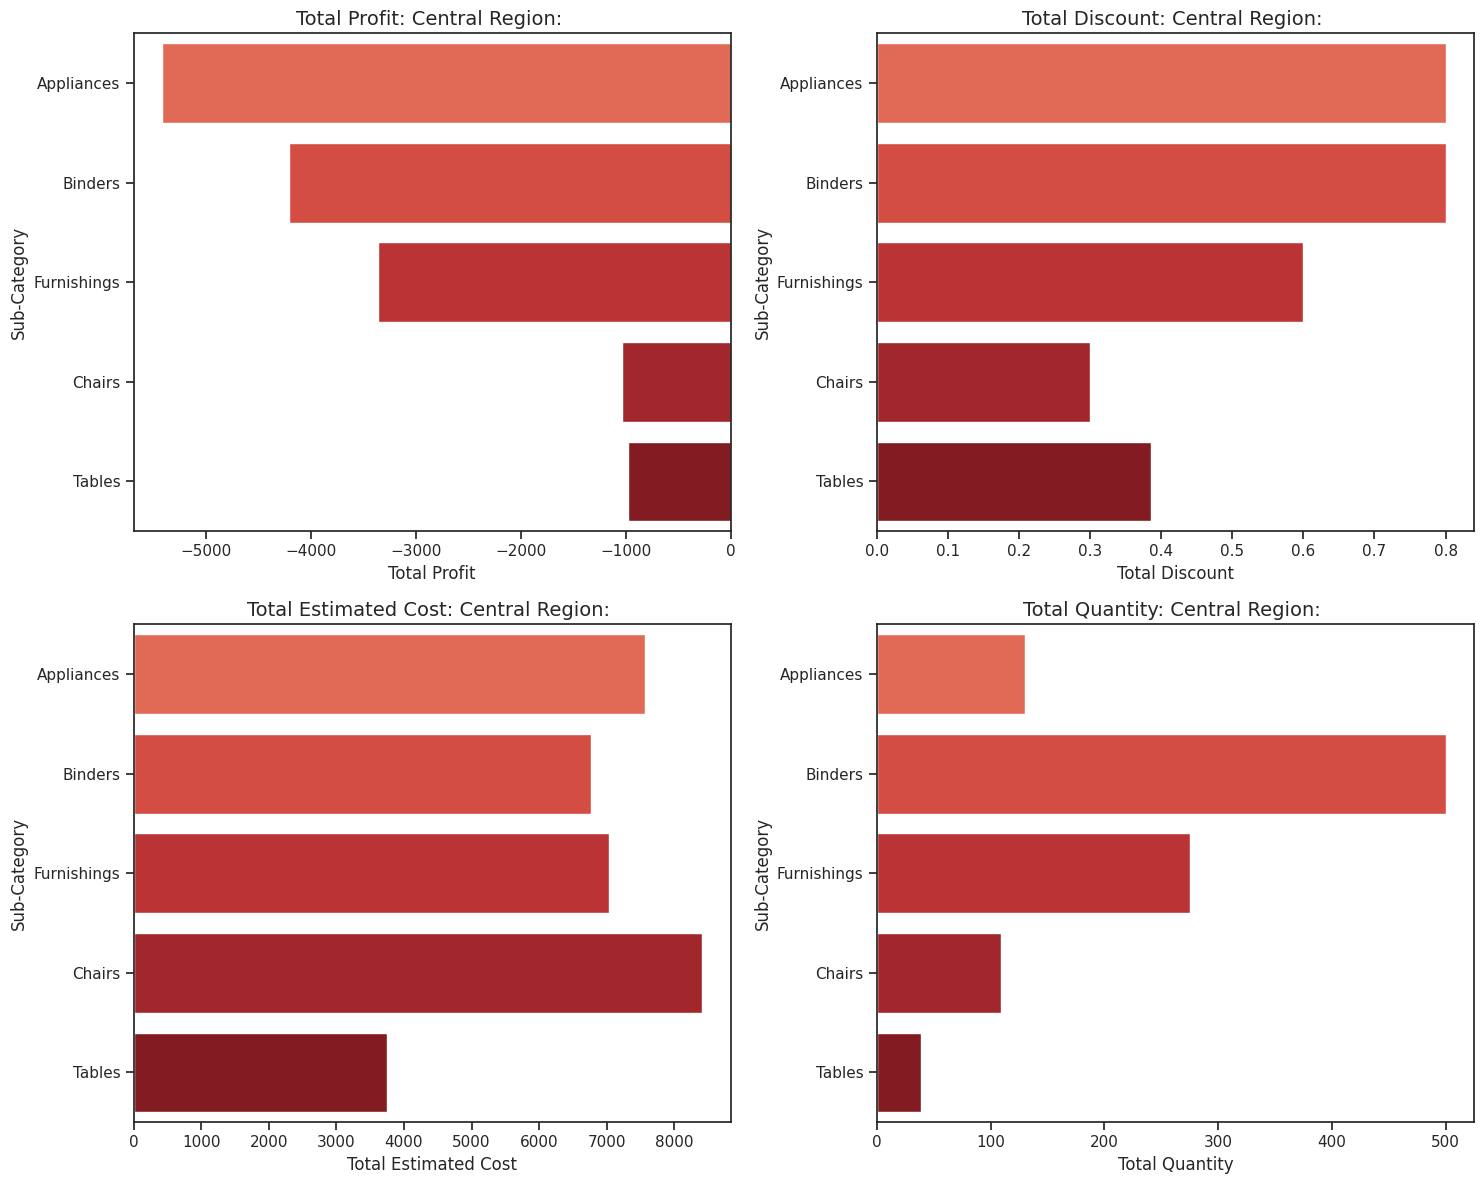

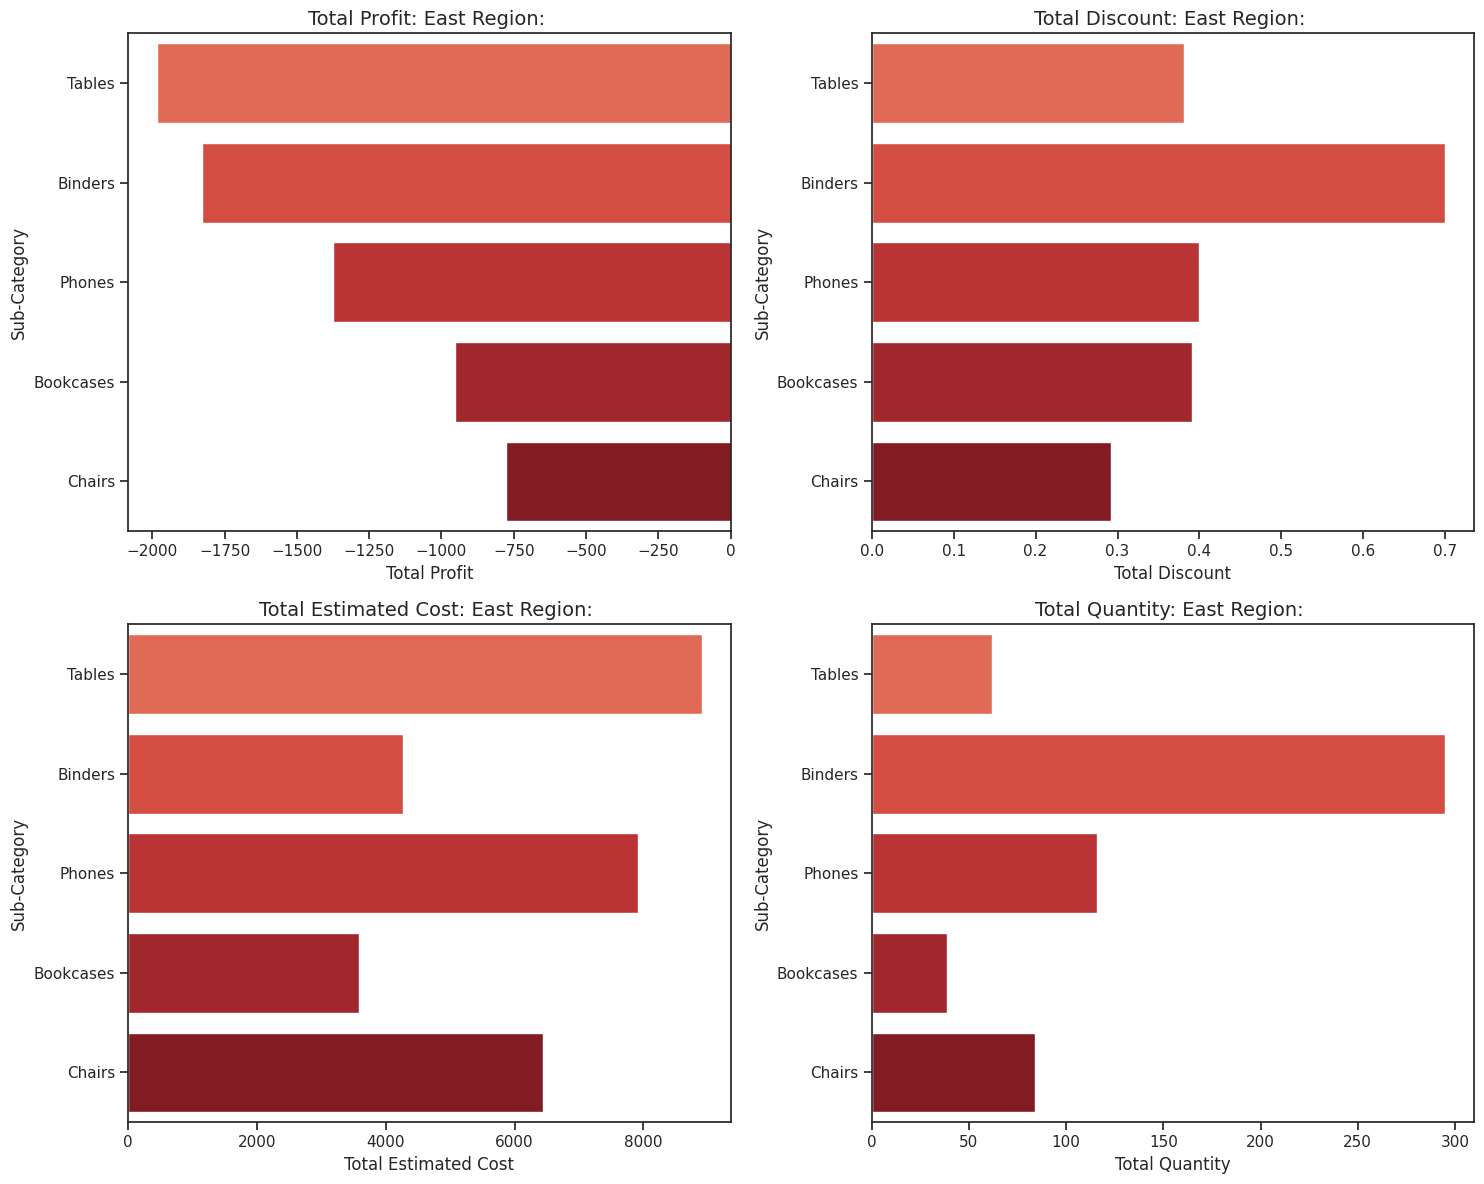

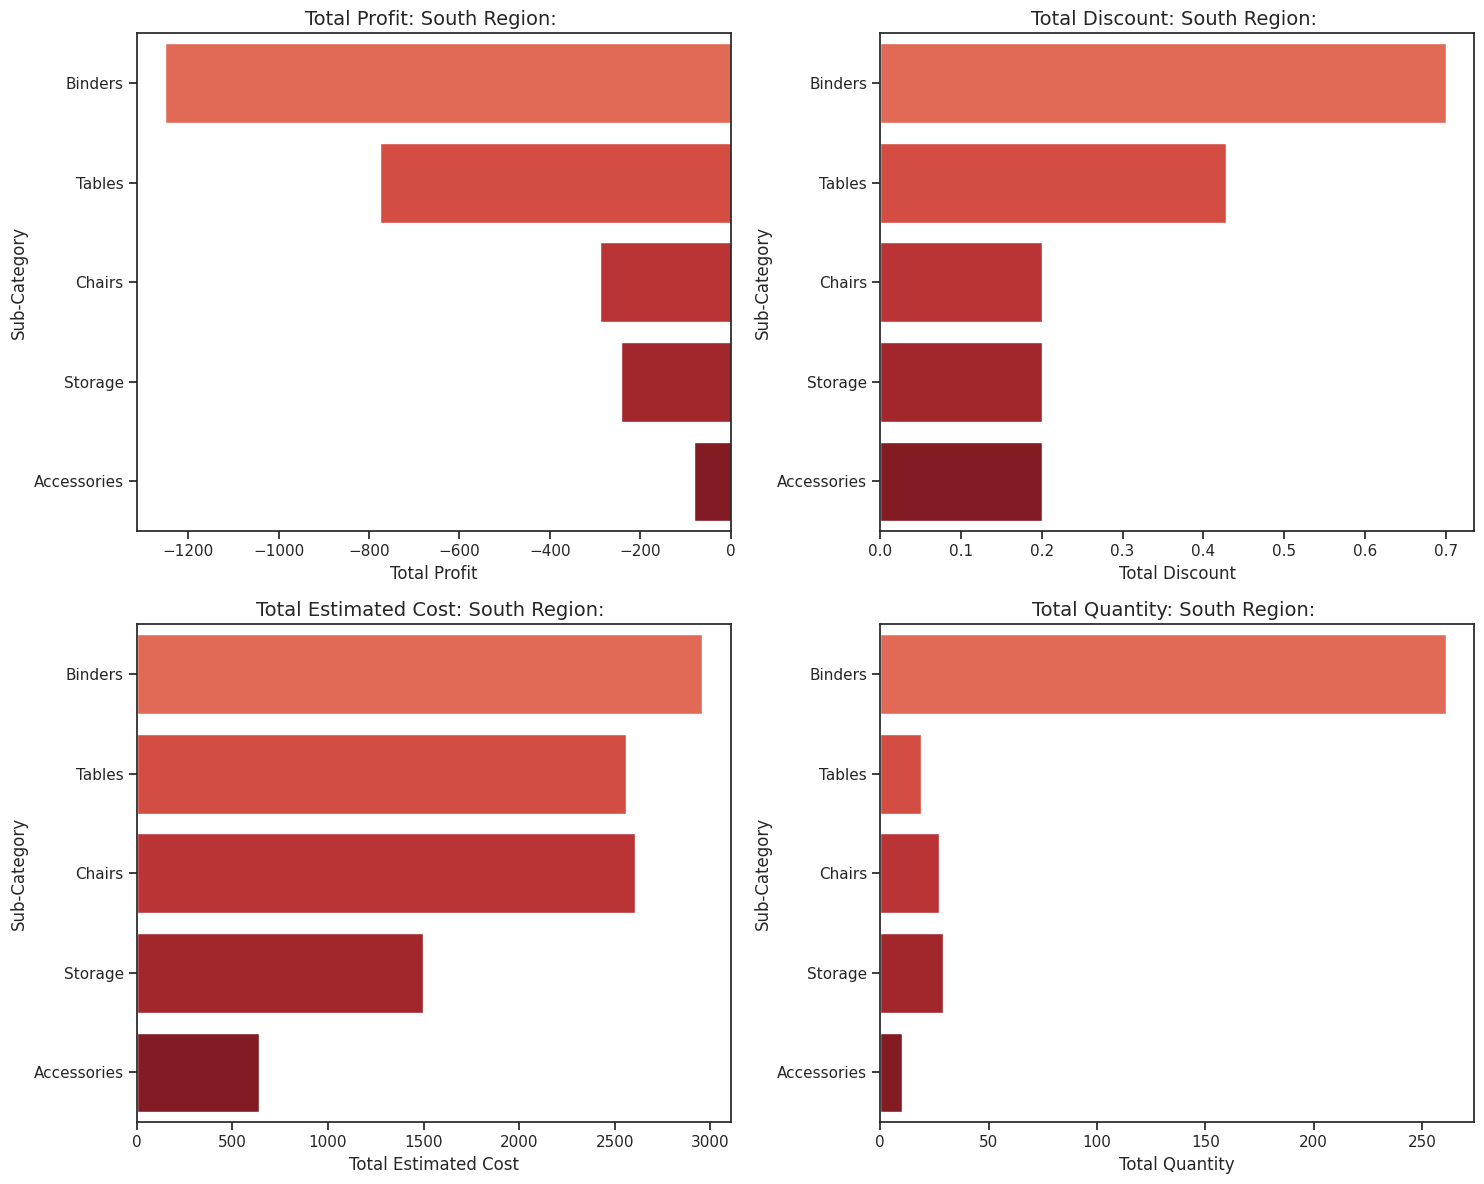

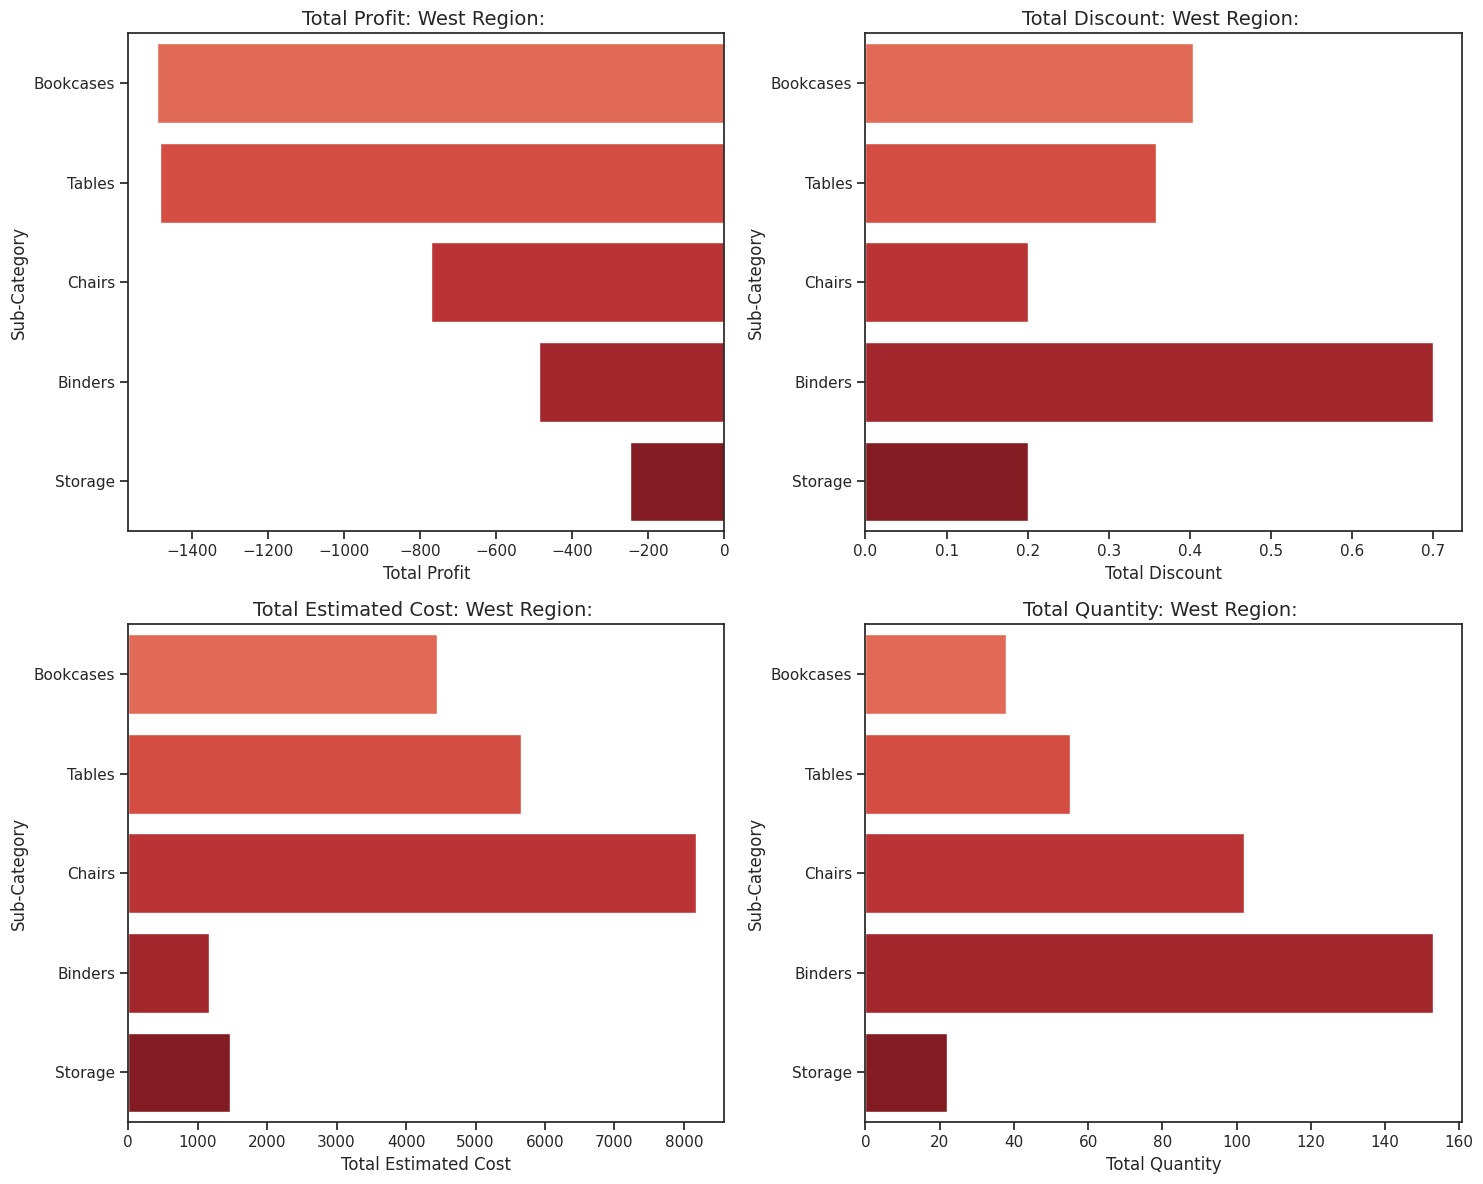

In [ ]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

# Metrics to analyze
metrics = ['Total_Profit','Total_Discount', 'Total_Estimated_Cost', 'Total_Quantity']

# Split the data by region
regions = top_losses_by_region['Region'].unique()

# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Define a subset of darker reds
custom_palette = sns.color_palette("Reds", n_colors=10)[5:]  # Select the darker shades

# Plot metrics for each region
for region in regions:
    # Filter data for the current region
    region_data = top_losses_by_region[top_losses_by_region['Region'] == region]

    # Reset categories for Sub-Category to match filtered data
    region_data = region_data.copy()  # Avoid modifying the original dataframe
    region_data.loc[:, 'Sub-Category'] = region_data['Sub-Category'].astype('object').astype('category')

    # Sort by Total Profit (ascending for losses)
    region_data_sorted = region_data.sort_values(by='Total_Profit', ascending=True).reset_index(drop=True)

    # Plot the metrics
    dvu.plot_metric_grid_single_sort_by_loss(
        data=region_data_sorted,
        metrics=metrics,
        group_by='Sub-Category',
        title_prefix=f"{region} Region: ",
        palette=custom_palette
    )

    # Visualize the metrics and save the figure
    save_path = "/content/loss_region_category_subcategory_" + region + ".png"

    # Save the current figure
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Figure saved as {save_path}")




## Loss by Selected Region & Category

Figure saved as /content/loss_selected_region_category.png


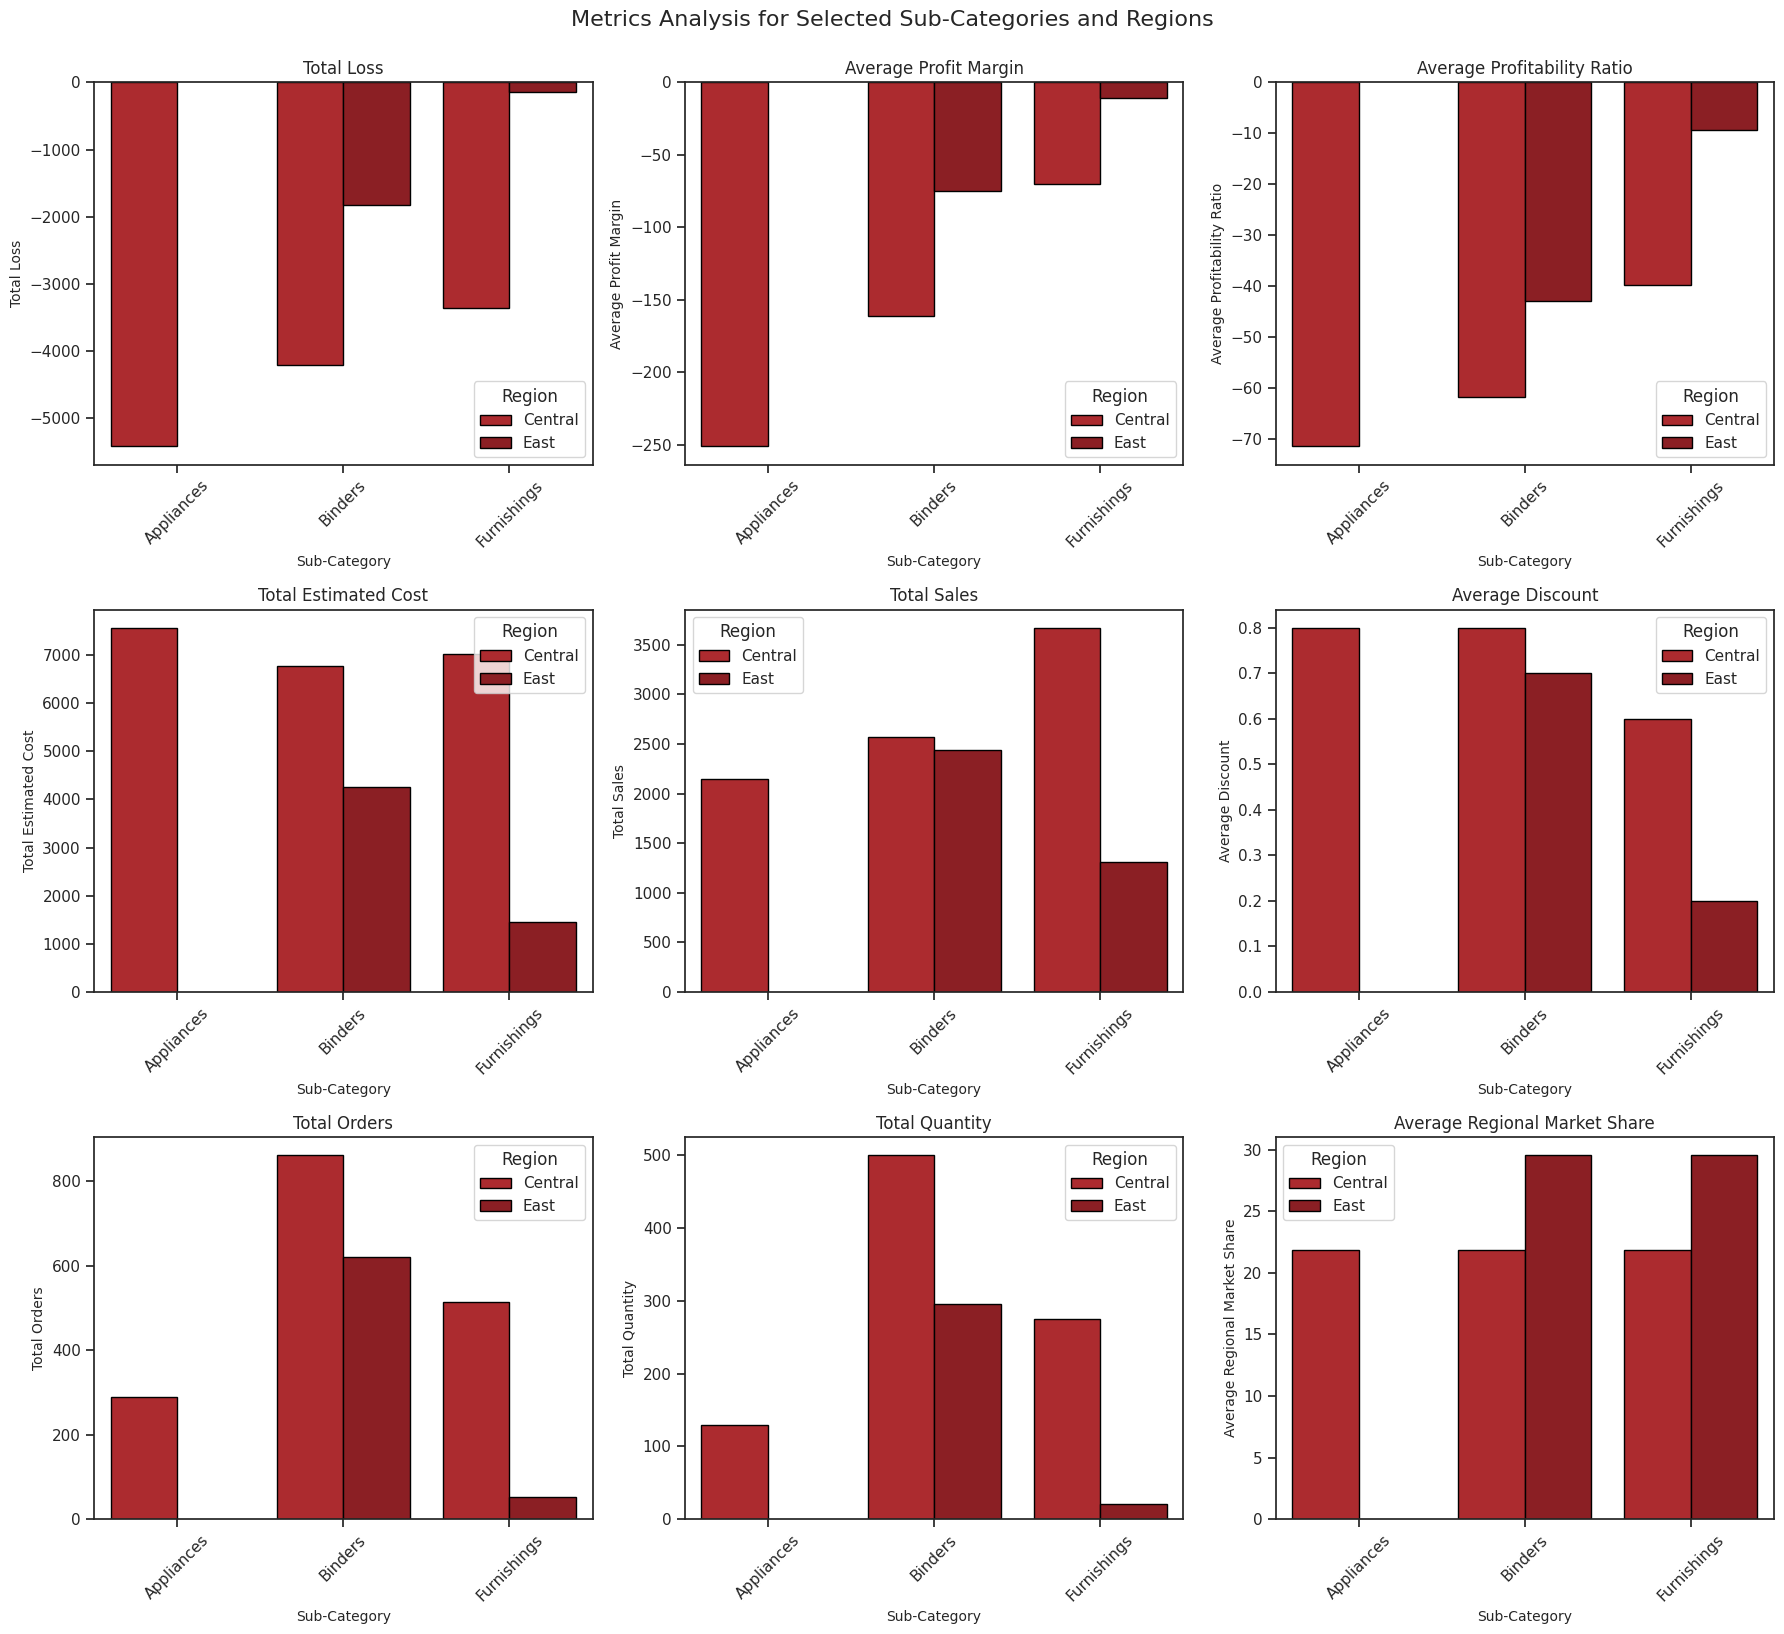

In [ ]:
# Define the filters
selected_regions = ['Central', 'East']
selected_subcategories = ['Appliances', 'Binders', 'Furnishings']

# Define the metrics to plot (Display Name: Column Name)
metrics_to_plot = {
    "Total Loss": "Total_Profit",
    "Average Profit Margin": "Total_Profit_Margin",
    "Average Profitability Ratio": "Total_Profitability_Ratio",
    "Total Estimated Cost": "Total_Estimated_Cost",
    "Total Sales": "Total_Sales",
    "Average Discount": "Total_Discount",
    "Total Orders": "Total_Order_Count",
    "Total Quantity": "Total_Quantity",
    "Average Regional Market Share": "Total_Regional_Market_Share_(%)"
}

# Filter the data
filtered_data = table_subcategory_region[
    (table_subcategory_region['Region'].isin(selected_regions)) &
    (table_subcategory_region['Sub-Category'].isin(selected_subcategories))
].copy()

# Convert to categorical for consistent plotting
filtered_data['Sub-Category'] = pd.Categorical(filtered_data['Sub-Category'], categories=selected_subcategories)
filtered_data['Region'] = pd.Categorical(filtered_data['Region'], categories=selected_regions)

# Visualize the metrics and save the figure
save_path = "/content/loss_selected_region_category.png"

# Call the plot function for all metrics
dvu.plot_filtered_metrics_grid(
    data=filtered_data,
    selected_regions=selected_regions,
    selected_subcategories=selected_subcategories,
    metrics=metrics_to_plot,
    title="Metrics Analysis for Selected Sub-Categories and Regions",
    palette="Reds",
    figsize=(18, 16)
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

#### Data Utils Script

In [ ]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(data):
    """
    Prepares and preprocesses the Superstore dataset by cleaning, deriving core metrics,
    and converting appropriate columns to categorical types.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Derived Metrics
    # 1. Profit Margin
    data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100

    # 2. Estimated Cost
    data['Estimated Cost'] = data['Sales'] - data['Profit']

    # 3. Profitability Ratio
    # Avoid division by zero errors by checking non-zero estimated cost
    data['Profitability Ratio'] = data.apply(
        lambda row: (row['Profit'] / row['Estimated Cost']) * 100 if row['Estimated Cost'] != 0 else 0,
        axis=1
    )

    # 4. Customer Metrics: Total Sales, Profit, and Order Count
    customer_metrics = data.groupby('Customer ID').agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Order ID': 'nunique'  # Number of orders
    }).rename(columns={'Order ID': 'Order Count'})

    # 5. Regional Market Share
    region_sales = data.groupby('Region')['Sales'].sum()
    total_sales = data['Sales'].sum()
    regional_market_share = (region_sales / total_sales) * 100

    # Merge customer metrics back to the main dataset
    data = data.merge(customer_metrics, on='Customer ID', suffixes=('', '_Customer'))
    data['Regional Market Share (%)'] = data['Region'].map(region_sales / total_sales * 100)

    # Convert relevant columns to categorical
    categorical_columns = ['Category', 'Sub-Category', 'Region', 'Segment', 'Ship Mode']
    for column in categorical_columns:
        data[column] = data[column].astype('category')

    return data


def convert_to_category_and_visualize(data, threshold=25, exclude_columns=None):
    """
    Converts columns with fewer than 'threshold' unique values to 'category' dtype,
    excluding specified columns, and visualizes the unique value counts.
    """
    if exclude_columns is None:
        exclude_columns = []

    # Count unique values for each column
    unique_counts = data.nunique()

    # Identify columns to convert, excluding specified columns
    columns_to_convert = [
        col for col in unique_counts[unique_counts < threshold].index
        if col not in exclude_columns
    ]

    # Convert selected columns to 'category' dtype
    for column in columns_to_convert:
        data[column] = data[column].astype('category')

    # Filter for columns with fewer than threshold unique values for visualization
    filtered_counts = unique_counts[
        (unique_counts < threshold) & (~unique_counts.index.isin(exclude_columns))
    ]

    # # Visualize unique value counts
    # palette = sns.color_palette("Pastel2", len(filtered_counts))
    # plt.figure(figsize=(9, 5))
    # filtered_counts.sort_values(ascending=False).plot(
    #     kind='bar',
    #     color=palette,
    #     edgecolor='black'
    # )
    # plt.title('Unique Value Counts for Columns Converted to Category', fontsize=14)
    # plt.xlabel('Columns', fontsize=12)
    # plt.ylabel('Number of Unique Categories', fontsize=12)
    # plt.xticks(rotation=45, ha='right', fontsize=10)
    # plt.grid(axis='y', linestyle='--', alpha=0.3)
    # plt.tight_layout()
    # plt.show()

    # Verify the conversions
    # print("\nColumns converted to 'category' dtype:")
    # for column in columns_to_convert:
    #     print(f"{column}: {data[column].dtype}")

    return data

def add_time_based_columns(data):
    """
    Adds time-based columns derived from Order Date and Ship Date to the dataset,
    and converts these columns to categorical type for analysis and visualization.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Create new time-based columns
    data['Order Year'] = data['Order Date'].dt.year
    data['Order Quarter'] = data['Order Date'].dt.quarter
    data['Order Month'] = data['Order Date'].dt.month
    data['Order Day'] = data['Order Date'].dt.day
    data['Order Weekday'] = data['Order Date'].dt.day_name()  # e.g., 'Monday', 'Tuesday'

    data['Ship Month'] = data['Ship Date'].dt.month
    data['Ship Day'] = data['Ship Date'].dt.day
    data['Ship Weekday'] = data['Ship Date'].dt.day_name()

    # Convert the new columns to categorical
    time_columns = ['Order Year', 'Order Month', 'Order Month', 'Order Day', 'Order Weekday', 'Ship Month', 'Ship Day', 'Ship Weekday']
    for column in time_columns:
        data[column] = data[column].astype('category')

    return data

def standardize_categorical_columns(data, columns=None):
    """
    Standardizes categorical columns by converting their values to title case.
    If `columns` is None, all categorical columns are standardized.
    """
    if columns is None:
        columns = data.select_dtypes(include='category').columns

    for column in columns:
        if column in data.columns:
            data[column] = data[column].astype(str).str.title().astype('category')
    return data


def remove_duplicates(data, subset=None):
    """
    Removes duplicate rows from the dataset and reports the number of rows removed.

    Parameters:
    - data: DataFrame
        The dataset to remove duplicates from.
    - subset: list or None, optional
        Columns to consider for identifying duplicates. If None, all columns are used.

    Returns:
    - DataFrame: A new DataFrame with duplicates removed.
    """
    initial_shape = data.shape
    # Drop duplicates using the provided subset or across all columns if subset is None
    data = data.loc[~data.duplicated(subset=subset)].copy()
    removed_rows = initial_shape[0] - data.shape[0]
    print(f"Removed {removed_rows} duplicate rows.")
    return data


def calculate_aggregate_metrics(data, group_by_columns):
    """
    Dynamically calculates aggregate metrics for specified groupings.

    Parameters:
    - data: DataFrame
        The dataset to calculate metrics from.
    - group_by_columns: list
        The columns to group the data by.

    Returns:
    - DataFrame: A new DataFrame with the aggregated metrics.
    """
    # Define the aggregation columns and their operations
    aggregation_columns = {
        'Profit': 'sum',
        'Profit Margin': 'mean',
        'Profitability Ratio': 'mean',  # New metric
        'Estimated Cost': 'sum',
        'Sales': 'sum',
        'Discount': 'mean',
        'Order Count': 'sum',
        'Quantity': 'sum',
        'Regional Market Share (%)': 'mean'  # New metric
    }

    # Perform the group-by operation and apply aggregations
    aggregated_data = data.groupby(group_by_columns, observed=True).agg(**{
        f"Total_{key.replace(' ', '_')}": (key, agg_func)
        for key, agg_func in aggregation_columns.items()
    })

    # Reset index for better readability
    aggregated_data = aggregated_data.reset_index()

    return aggregated_data

def detect_outliers_tukey(data, column):
    """
    Detects outliers using Tukey's Fences method for a specified column.

    Parameters:
    - data: DataFrame
        The dataset to analyze.
    - column: str
        The column for which to detect outliers.

    Returns:
    - non_outliers: DataFrame
        Subset of data without outliers.
    - outliers: DataFrame
        Subset of data containing outliers.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    non_outliers = data[(data[column] >= lower_fence) & (data[column] <= upper_fence)]
    outliers = data[(data[column] < lower_fence) | (data[column] > upper_fence)]

    return non_outliers, outliers

def remove_outliers_tukey(data, column, plot=True):
    """
    Removes outliers from a specified column in the dataset using Tukey's Fences (IQR Method),
    and optionally plots the data before and after outlier removal.

    Parameters:
    - data (DataFrame): The input dataset.
    - column (str): The column on which to perform outlier detection.
    - plot (bool): Whether to plot boxplots for the original and filtered data.

    Returns:
    - filtered_data (DataFrame): Dataset without outliers.
    - outliers (DataFrame): Outlier data points.

    Example:
        filtered_data, outliers = remove_outliers_tukey(data, column='Sales', plot=True)

    Notes:
        - This function uses Tukey's Fences (IQR method) to detect and remove outliers.
        - Suitable for continuous numeric data with potential outliers.
    """
    # Compute Q1, Q3, and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define fences
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Filter data
    filtered_data = data[(data[column] >= lower_fence) & (data[column] <= upper_fence)].copy()
    outliers = data[(data[column] < lower_fence) | (data[column] > upper_fence)].copy()

    # Print summary
    print(f"Column: {column}")
    print(f"Lower Fence: {lower_fence:.2f}, Upper Fence: {upper_fence:.2f}")
    print(f"Original Dataset: {len(data)} rows")
    print(f"Non-Outliers: {len(filtered_data)} rows ({len(filtered_data) / len(data) * 100:.2f}%)")
    print(f"Outliers: {len(outliers)} rows ({len(outliers) / len(data) * 100:.2f}%)")

    # Plotting
    if plot:
        sns.set_theme(style="whitegrid", context="notebook")

        # Plot original data
        if len(data) > 0:
            plt.figure(figsize=(8, 3))
            sns.boxplot(x=data[column], color='darkorange')
            plt.title(f"Original {column} Distribution (With Outliers)", fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.tight_layout()
            plt.show()

        # Plot filtered data
        if len(filtered_data) > 0:
            plt.figure(figsize=(8, 3))
            sns.boxplot(x=filtered_data[column], color='pink')
            plt.title(f"Filtered {column} Distribution (Without Outliers)", fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.tight_layout()
            plt.show()

    return filtered_data, outliers


'''

with open("data_prep_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_prep_utils.py")

# Import and reload the module to use its functions
import importlib
import data_prep_utils as dpu
importlib.reload(dpu)



Script successfully written to data_prep_utils.py


<module 'data_prep_utils' from '/content/data_prep_utils.py'>

#### Data Visualization Script

In [ ]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_sales_distribution(data, column='Sales', title='Sales Distribution Visualizations', color='lightgreen'):
    """
    Visualizes the distribution of a specified column with a barplot, boxplot, and histogram (with KDE).

    Args:
        data (pd.DataFrame): The dataset containing the sales data.
        column (str): The column to visualize. Default is 'Sales'.
        title (str): The title for the overall plot.
        color (str): The color for the visualizations. Default is 'lightgreen'.

    Returns:
        None: Displays the plots directly.
    """
    # Set Seaborn theme
    sns.set_theme(style="ticks", context="talk")

    # Create the figure and subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1, 2]})

    # Barplot: Total sales
    total_value = data[column].sum()
    sns.barplot(x=[column], y=[total_value], color=color, edgecolor='k', ax=axes[0])
    axes[0].set_title(f"Total {column} (Barplot)", fontsize=14)
    axes[0].set_xlabel("")
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Boxplot: Distribution of sales
    sns.boxplot(y=data[column], color=color, showfliers=True, ax=axes[1], linecolor='k')
    axes[1].set_title(f"{column} Distribution (Boxplot)", fontsize=14)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("")

    # Histogram with KDE: Overall sales distribution
    sns.histplot(data=data, x=column, kde=True, color=color, ax=axes[2])
    axes[2].set_title(f"{column} Distribution (Histogram + KDE)", fontsize=14)
    axes[2].set_xlabel(column, fontsize=12)
    axes[2].set_ylabel("Frequency", fontsize=12)
    axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))
    axes[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Adjust layout
    plt.tight_layout()
    plt.suptitle(title, fontsize=20, y=1.03)
    # plt.show()

# Define a function to calculate summary statistics for a given column
def calculate_discount_stats(data, column='Discount'):
    """
    Calculates summary statistics for a specific column in the given dataset.

    Args:
        data (pd.DataFrame): The dataset to calculate statistics from.
        column (str): The column to calculate statistics for.

    Returns:
        dict: A dictionary of summary statistics.
    """
    stats = {
        'Min': data[column].min(),
        'Max': data[column].max(),
        'Mean': data[column].mean(),
        'Median': data[column].median(),
        'Standard Deviation': data[column].std()
    }
    return stats

def plot_discount_analysis_grid(data_losses, data_profits, summary_table, column='Discount'):
    """
    Creates a grid of plots for discount analysis, including:
    - A barplot of summary statistics
    - A KDE plot of discount distributions
    - A boxplot comparing discounts by profitability.

    Args:
        data_losses (pd.DataFrame): Dataset with losses (Profit < 0).
        data_profits (pd.DataFrame): Dataset with profits (Profit >= 0).
        summary_table (pd.DataFrame): Summary statistics table for discounts.
        column (str): The column to analyze. Default is 'Discount'.

    Returns:
        None: Displays the plots.
    """
    import pandas as pd
    import matplotlib.gridspec as gridspec

    # Create copies to avoid warnings
    data_losses_copy = data_losses.copy()
    data_profits_copy = data_profits.copy()

    # Add group labels
    data_losses_copy['Group'] = 'Losses (Profit < 0)'
    data_profits_copy['Group'] = 'Profits (Profit >= 0)'

    # Combine datasets for boxplot
    combined_data = pd.concat([data_losses_copy, data_profits_copy], ignore_index=True)

    # Set up the grid layout
    fig = plt.figure(figsize=(14, 10))
    gs = gridspec.GridSpec(2, 2, width_ratios=[2,1], height_ratios=[1, 1], hspace=0.3, wspace=0.2)

    # Plot 1: Summary statistics barplot
    ax1 = fig.add_subplot(gs[0, 0])
    sns.barplot(
        data=summary_table.melt(id_vars=['Statistic'], var_name='Group', value_name='Value'),
        x='Statistic',
        y='Value',
        hue='Group',
        palette={"Losses (Profit < 0)": "red", "Profits (Profit >= 0)": "green"},
        ax=ax1
    )
    ax1.set_title("Summary Statistics for Profits", fontsize=14)
    ax1.set_ylabel("Value", fontsize=12)
    ax1.set_xlabel("Statistic", fontsize=12)
    ax1.legend(title="Group", fontsize=10, title_fontsize=12)

    # Plot 2: KDE plot
    ax2 = fig.add_subplot(gs[1,0])
    sns.kdeplot(data=data_losses[column], fill=True, color="red", alpha=0.5, label="Losses (Profit < 0)", ax=ax2, linewidth=2)
    sns.kdeplot(data=data_profits[column], fill=True, color="green", alpha=0.5, label="Profits (Profit >= 0)", ax=ax2, linewidth=2)
    ax2.set_title("Profit Distributions", fontsize=14)
    ax2.set_xlabel(column, fontsize=12)
    ax2.set_ylabel("Density", fontsize=12)
    ax2.legend(title="Group", fontsize=10, title_fontsize=12)

    # Plot 3: Boxplot
    ax3 = fig.add_subplot(gs[:,1])
    sns.boxplot(
        data=combined_data,
        x='Group',
        y=column,
        hue='Group',
        palette={"Losses (Profit < 0)": "red", "Profits (Profit >= 0)": "green"},
        ax=ax3,
        showfliers=True
    )
    ax3.set_title("Profit by Profitability", fontsize=14)
    ax3.set_xlabel("Group", fontsize=12)
    ax3.set_ylabel(column, fontsize=12)
    ax3.legend([], [], frameon=False)  # Remove redundant legend

    # Adjust layout and display the grid
    # plt.tight_layout()
    # plt.show()


def calculate_stats(data, column, **kwargs):
    """
    Calculate descriptive statistics for a given column and return selected metrics.

    Args:
        data (pd.DataFrame): The dataset.
        column (str): Column name for which to calculate statistics.
        kwargs: Keyword arguments specifying which statistics to calculate.

    Returns:
        dict: Dictionary of selected descriptive statistics.
    """
    stats = {}

    # Calculate all available statistics
    all_stats = {
        "min": data[column].min(),
        "median": data[column].median(),
        "mean": data[column].mean(),
        "mode": data[column].mode().iloc[0],  # First mode
        "std": data[column].std(),
        "max": data[column].max(),
        "range": data[column].max() - data[column].min()
    }

    # Filter based on kwargs or include all if no kwargs specified
    if not kwargs:
        stats = all_stats  # Return all stats if no specific arguments provided
    else:
        stats = {stat: all_stats[stat] for stat, include in kwargs.items() if include}

    return stats

def plot_descriptive_stats(stats, column_name, color_palette="Pastel2"):
    """
    Visualizes descriptive statistics as a horizontal barplot, with the column name in the title.

    Args:
        stats (dict): Dictionary of descriptive statistics where keys are statistic names and values are their numeric values.
        column_name (str): Name of the column the statistics represent (e.g., 'Sales', 'Profit').
        color_palette (str): Seaborn color palette for the bars. Default is "Pastel2".

    Returns:
        None: Displays the plot directly.
    """

    # Convert stats dictionary to DataFrame
    stats_df = pd.DataFrame(stats.items(), columns=["Statistic", "Value"])

    # Create the horizontal barplot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=stats_df,
        y="Statistic",  # Use y-axis for categories
        x="Value",  # Use x-axis for values
        hue="Statistic", palette=color_palette,
        edgecolor="black"
    )

    # Add value annotations to each bar
    for index, row in stats_df.iterrows():
        ax.text(
            row["Value"] + 5,  # Slightly offset to the right of the bar
            index,  # Position at the center of the bar
            f"${row['Value']:,.2f}",  # Format with full value
            va="center",  # Center vertically
            ha="left",  # Align text to the left of the bar
            fontsize=12
        )

    # Add labels and title
    plt.title(f"Descriptive Statistics for {column_name}", fontsize=16)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("")
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
    plt.tight_layout()
    # plt.show()

def plot_metrics_grid(data1, data2=None, metrics=None, group_by_column="", title_prefix="", palette="Greens_d", figsize=(15, 12)):
    """
    Plots a grid of barplots for single or multiple datasets with multiple metrics.

    Args:
        data1 (pd.DataFrame): Primary dataset.
        data2 (pd.DataFrame, optional): Secondary dataset for comparison. Defaults to None.
        metrics (list): List of column names to plot.
        group_by_column (str): Column to group by on the x-axis.
        title_prefix (str): Prefix for each plot's title.
        palette (str): Seaborn color palette.
        figsize (tuple): Size of the figure (width, height).

    Returns:
        None: Displays the plots.
    """

    datasets = [data1] if data2 is None else [data1, data2]
    titles = [""] if data2 is None else ["Dataset 1", "Dataset 2"]

    # Determine grid size
    n_cols = 3
    n_rows = -(-len(metrics) * len(datasets) // n_cols)  # Ceiling division
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, metric in enumerate(metrics or []):
        for j, (data, title_suffix) in enumerate(zip(datasets, titles)):
            idx = i * len(datasets) + j
            if idx < len(axes):
                sns.barplot(
                    data=data.sort_values(by=metric, ascending=False),
                    x=group_by_column,
                    y=metric,
                    hue=metric, palette=palette, legend=False, dodge=False,
                    ax=axes[idx]
                )
                axes[idx].set_title(f"{title_prefix}{metric.replace('_', ' ')} {title_suffix}")
            else:
                axes[idx].axis('off')

    plt.tight_layout()
    # plt.show()

def plot_metrics_grid_sorted(data1, data2=None, metrics=None, group_by_column="", title_prefix="", palette="Greens_d", figsize=(15, 12)):
    """
    Plots a grid of barplots for single or multiple datasets with multiple metrics,
    ordering the data to highlight the largest losses or gains.

    Args:
        data1 (pd.DataFrame): Primary dataset.
        data2 (pd.DataFrame, optional): Secondary dataset for comparison. Defaults to None.
        metrics (list): List of column names to plot.
        group_by_column (str): Column to group by on the x-axis.
        title_prefix (str): Prefix for each plot's title.
        palette (str): Seaborn color palette.
        figsize (tuple): Size of the figure (width, height).

    Returns:
        None: Displays the plots.
    """

    datasets = [data1] if data2 is None else [data1, data2]
    titles = [""] if data2 is None else ["Dataset 1", "Dataset 2"]

    # Determine grid size
    n_cols = 3
    n_rows = -(-len(metrics) * len(datasets) // n_cols)  # Ceiling division
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, metric in enumerate(metrics or []):
        for j, (data, title_suffix) in enumerate(zip(datasets, titles)):
            idx = i * len(datasets) + j
            if idx < len(axes):
                # Sort by metric for visual emphasis
                ascending = data[metric].min() < 0  # Ascending if the metric contains losses
                data_sorted = data.sort_values(by=metric, ascending=ascending)

                sns.barplot(
                    data=data_sorted,
                    x=group_by_column,
                    y=metric, order=data.sort_values(by=metric, ascending=False)[group_by_column],
                    hue=metric, palette=palette, legend=False, dodge=False,
                    ax=axes[idx]
                )
                axes[idx].set_title(f"{title_prefix}{metric.replace('_', ' ')} {title_suffix}")
                axes[idx].set_xlabel(group_by_column.replace('_', ' '), fontsize=10)
                axes[idx].set_ylabel(metric.replace('_', ' '), fontsize=10)
                axes[idx].tick_params(axis="x", rotation=45)
            else:
                axes[idx].axis('off')

    plt.tight_layout()
    # plt.show()



def plot_metrics_grid_2(data1, data2=None, metrics=None, group_by_column="", title1="", title2="", palette="Greens_d", figsize=(15, 12)):
    """
    Plots a 1x2 grid of barplots for single or multiple datasets with multiple metrics.

    Parameters:
        data1 (pd.DataFrame): Primary dataset.
        data2 (pd.DataFrame, optional): Secondary dataset for comparison. Defaults to None.
        metrics (list): List of column names to plot.
        group_by_column (str): Column to group by on the y-axis.
        title1 (str): Title for the first dataset.
        title2 (str): Title for the second dataset.
        palette (str): Seaborn color palette.
        figsize (tuple): Size of the figure (width, height).

    Returns:
        None: Displays the plots.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Ensure metrics is not None
    metrics = metrics or []

    # Check if single or dual dataset
    datasets = [data1] if data2 is None else [data1, data2]
    titles = [title1] if data2 is None else [title1, title2]

    for metric in metrics:
        fig, axes = plt.subplots(1, len(datasets), figsize=figsize)

        if len(datasets) == 1:
            axes = [axes]  # Ensure axes is iterable for single plot

        for i, (data, title_suffix, ax) in enumerate(zip(datasets, titles, axes)):
            # Sort data by the current metric
            data_sorted = data.sort_values(by=metric, ascending=False)

            # Set the category order for the plot
            category_order = data_sorted[group_by_column]

            sns.barplot(
                data=data_sorted,
                x=metric,
                y=group_by_column,
                hue=metric, palette=palette, legend=False, dodge=False,
                order=category_order,  # Explicitly set the order
                ax=ax
            )
            ax.set_title(f"{title_suffix}: {metric.replace('_', ' ')}", fontsize=14)
            ax.set_xlabel(metric.replace('_', ' '), fontsize=12)
            ax.set_ylabel(group_by_column.replace('_', ' '), fontsize=12)

        # Adjust layout and show plot
        plt.tight_layout()
        # plt.show()


def plot_metric_grid_single(data, metrics, group_by, title_prefix="", palette="Greens_d", figsize=(15, 12)):
    """
    Plots a 2x2 grid of barplots for a given dataset and multiple metrics.

    Parameters:
    - data: DataFrame
        The dataset to plot (e.g., filtered data by region).
    - metrics: list
        The metrics to plot (e.g., ['Total_Profit', 'Total_Profit_Margin']).
    - group_by: str
        The column to group the data by for plotting (e.g., 'Sub-Category').
    - title_prefix: str
        The prefix for each plot title (e.g., 'Central Region: ').
    - palette: str
        The color palette to use for the barplots.
    - figsize: tuple
        The size of the entire figure (width, height).

    Returns:
    - None: Displays the plots.
    """

    # Set up a 2x2 grid
    n_rows, n_cols = 2, 2
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    # Loop through metrics and plot each
    for i, metric in enumerate(metrics):
        if i < len(metrics):
            # Sort data by the current metric
            data_sorted = data.sort_values(by=metric, ascending=False).reset_index(drop=True)

            # Use group_by column values for ordering
            order = data_sorted[group_by].tolist()

            # Plot the barplot
            sns.barplot(
                data=data_sorted,
                x=metric,
                y=group_by,
                palette=palette,
                order=order,
                ax=axes[i]
            )
            axes[i].set_title(f"{title_prefix}{metric.replace('_', ' ')}", fontsize=14)
            axes[i].set_xlabel(metric.replace('_', ' '), fontsize=12)
            axes[i].set_ylabel(group_by.replace('_', ' '), fontsize=12)
        else:
            # Turn off unused subplots
            axes[i].axis('off')

    # Adjust layout
    plt.tight_layout()
    # plt.show()

def plot_metric_grid_single_sort_by_loss(data, metrics, group_by, title_prefix="", palette="Greens_d", figsize=(15, 12)):
    """
    Plots a 2x2 grid of barplots for a given dataset and multiple metrics, ensuring consistent sorting.

    Parameters:
    - data: DataFrame
        The dataset to plot (e.g., filtered data by region).
    - metrics: list
        The metrics to plot (e.g., ['Total_Profit', 'Total_Profit_Margin']).
    - group_by: str
        The column to group the data by for plotting (e.g., 'Sub-Category').
    - title_prefix: str
        The prefix for each plot title (e.g., 'Central Region: ').
    - palette: str
        The color palette to use for the barplots.
    - figsize: tuple
        The size of the entire figure (width, height).

    Returns:
    - None: Displays the plots.
    """

    # Set up a 2x2 grid
    n_rows, n_cols = 2, 2
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    # Define a consistent order using the absolute value of the first metric
    consistent_order = data.sort_values(by=metrics[0], key=lambda x: abs(x), ascending=False)[group_by].tolist()

    # Loop through metrics and plot each
    for i, metric in enumerate(metrics):
        if i < len(metrics):
            # Sort data using consistent order
            data_sorted = data.copy()
            data_sorted[group_by] = pd.Categorical(data[group_by], categories=consistent_order, ordered=True)

            # Plot the barplot
            sns.barplot(
                data=data_sorted,
                x=metric,
                y=group_by,
                palette=palette,
                order=consistent_order,
                ax=axes[i]
            )
            axes[i].set_title(f"{metric.replace('_', ' ')}: {title_prefix}", fontsize=14)
            axes[i].set_xlabel(metric.replace('_', ' '), fontsize=12)
            axes[i].set_ylabel(group_by.replace('_', ' '), fontsize=12)
        else:
            # Turn off unused subplots
            axes[i].axis('off')

    # Adjust layout
    plt.tight_layout()
    # plt.show()


def reset_categories(data, category_columns):
    """
    Resets the categories for the specified columns in the DataFrame.
    Converts columns to object and back to category to include only existing categories.

    Parameters:
    - data (pd.DataFrame): The input DataFrame.
    - category_columns (list): List of column names to reset categories for.

    Returns:
    - pd.DataFrame: The updated DataFrame with reset categories.
    """
    updated_data = data.copy()  # Avoid modifying the original DataFrame
    for column in category_columns:
        if column in updated_data.columns:
            updated_data.loc[:, column] = updated_data[column].astype('object').astype('category')
    return updated_data

def plot_metric_pair_grid_profit_discount(data, metric1, metric2, category, group_by, title_prefix="", palette="Reds_d", figsize=(12, 6)):
    """
    Plots a 1x2 grid with two metrics side by side for comparison, assuming the data is pre-sorted.

    Parameters:
    - data: DataFrame
        The dataset to plot.
    - metric1: str
        The first metric to plot (e.g., 'Total_Profit').
    - metric2: str
        The second metric to plot (e.g., 'Total_Discount').
    - group_by: str
        The column to group the data by for plotting (e.g., 'Sub-Category').
    - title_prefix: str
        The prefix for each plot title.
    - palette: str
        The color palette to use for both metrics.
    - figsize: tuple
        The size of the entire figure (width, height).

    Returns:
    - None: Displays the plots.
    """
    # Select colors from the palette
    custom_palette1 = sns.color_palette(palette, n_colors=len(data))[::-1]  # Darkest for largest losses
    custom_palette2 = sns.color_palette(palette, n_colors=len(data))  # Lightest for smallest discounts

    # Set up a 1x2 grid
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Plot the first metric (e.g., Total_Profit)
    sns.barplot(
        data=data,
        x=metric1,
        y=group_by,
        order=data[group_by],  # Use the pre-sorted order
        hue=metric1,
        palette=custom_palette1,
        legend=False,
        dodge=False,
        ax=axes[0]
    )
    # axes[0].set_title(f"{title_prefix}{metric1.replace('_', ' ')} for {category}", fontsize=14)
    axes[0].set_title(f"{metric1.replace('_', ' ')} for {category}", fontsize=14)
    axes[0].set_xlabel(metric1.replace('_', ' '), fontsize=12)
    axes[0].set_ylabel(group_by.replace('_', ' '), fontsize=12)

    # Plot the second metric (e.g., Total_Discount)
    sns.barplot(
        data=data,
        x=metric2,
        y=group_by,
        order=data[group_by],  # Use the same order as the first plot
        hue=metric2,
        palette=custom_palette2,
        legend=False,
        dodge=False,
        ax=axes[1]
    )
    # axes[1].set_title(f"{title_prefix}{metric2.replace('_', ' ')} for {category}", fontsize=14)
    axes[1].set_title(f"{metric2.replace('_', ' ')} for {category}", fontsize=14)
    axes[1].set_xlabel(metric2.replace('_', ' '), fontsize=12)
    axes[1].set_ylabel("")  # No need for y-axis label on the second plot

    # Adjust layout and show plot
    plt.tight_layout()
    # plt.show()

def plot_filtered_metrics_grid(data, selected_regions, selected_subcategories, metrics, title, palette="Greens", figsize=(20, 16)):
    """
    Plots a grid of barplots for specified metrics filtered by regions and sub-categories.

    Parameters:
    - data: DataFrame
        The dataset containing the metrics and filters.
    - selected_regions: list
        The regions to filter by.
    - selected_subcategories: list
        The sub-categories to filter by.
    - metrics: dict
        A dictionary of metrics with keys as display names and values as column names to plot.
    - title: str
        The title of the entire plot grid.
    - palette: str
        The Seaborn color palette to use for the plots.
    - figsize: tuple
        The size of the figure (width, height).

    Returns:
    - None: Displays the plots.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Filter the data based on selected regions and sub-categories
    filtered_data = data[
        (data['Region'].isin(selected_regions)) &
        (data['Sub-Category'].isin(selected_subcategories))
    ].copy()

    # Convert to categorical for consistent plotting
    filtered_data['Sub-Category'] = pd.Categorical(filtered_data['Sub-Category'], categories=selected_subcategories)
    filtered_data['Region'] = pd.Categorical(filtered_data['Region'], categories=selected_regions)

    # Create a custom palette
    # Define the number of colors needed
    num_colors = len(selected_regions)

    # Select colors from the bolder end of the spectrum
    custom_palette = sns.color_palette("Reds", n_colors=8)[-num_colors:]


    # Set up the grid dimensions
    n_cols = 3  # Number of columns
    n_rows = -(-len(metrics) // n_cols)  # Ceiling division for rows
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, sharex=False)

    # Flatten axes for easier iteration
    axes = axes.flatten()

    # Plot each metric
    for (display_name, column_name), ax in zip(metrics.items(), axes):
        sns.barplot(
            data=filtered_data,
            x="Sub-Category",
            y=column_name,
            hue="Region",
            palette=custom_palette,
            edgecolor="black",
            ax=ax
        )
        ax.set_title(display_name, fontsize=12)
        ax.set_xlabel("Sub-Category", fontsize=10)
        ax.set_ylabel(display_name, fontsize=10)
        ax.tick_params(axis="x", rotation=45)

    # Turn off unused axes
    for i in range(len(metrics), len(axes)):
        axes[i].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    # plt.show()


'''

with open("data_visualization_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_visualization_utils.py")

# Import and reload the module to use its functions
import importlib
import data_visualization_utils as dvu
importlib.reload(dvu)

Script successfully written to data_visualization_utils.py


<module 'data_visualization_utils' from '/content/data_visualization_utils.py'>

In [ ]:
# ft_table = table_subcategory[table_subcategory['Category'].isin(['Furniture', 'Technology'])]
# office_table = table_subcategory[table_subcategory['Category'].isin(['Office Supplies'])]

# import warnings
# # Suppress warnings
# warnings.filterwarnings("ignore")

# # Visualize metrics by sub-category with abbreviated labels
# dvu.plot_metrics_grid(
#     data=ft_table,
#     metrics=metrics,
#     group_by_column='Sub-Category',
#     title_prefix="Profit by Furniture & Tech: ",
#     palette="Reds_r",
#     abbrev=True  # Enable abbreviation for readability
# )

# # Visualize metrics by sub-category with abbreviated labels
# dvu.plot_metrics_grid(
#     data=office_table,
#     metrics=metrics,
#     group_by_column='Sub-Category',
#     title_prefix="Profit by Office Supply: ",
#     palette="Reds_r",
#     abbrev=True  # Enable abbreviation for readability
# )